# Week 6 Partition Data Recursively

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import sys

from sklearn import tree

# Set some options for printing all the columns
numpy.set_printoptions(precision = 10, threshold = sys.maxsize)
numpy.set_printoptions(linewidth = numpy.inf)

pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)

pandas.options.display.float_format = '{:,.10f}'.format

inputData = pandas.read_excel('Tiers.xlsx')

inputData

,Case,x,y,Class
0,1,81.2800000000,900,2
1,2,72.9000000000,900,2
2,3,80.7700000000,900,2
3,4,70.2700000000,900,1
4,5,24.8900000000,305,0
...,...,...,...,...
95,96,62.5400000000,888,1
96,97,46.1200000000,888,1
97,98,55.1900000000,888,1
98,99,64.9200000000,888,1


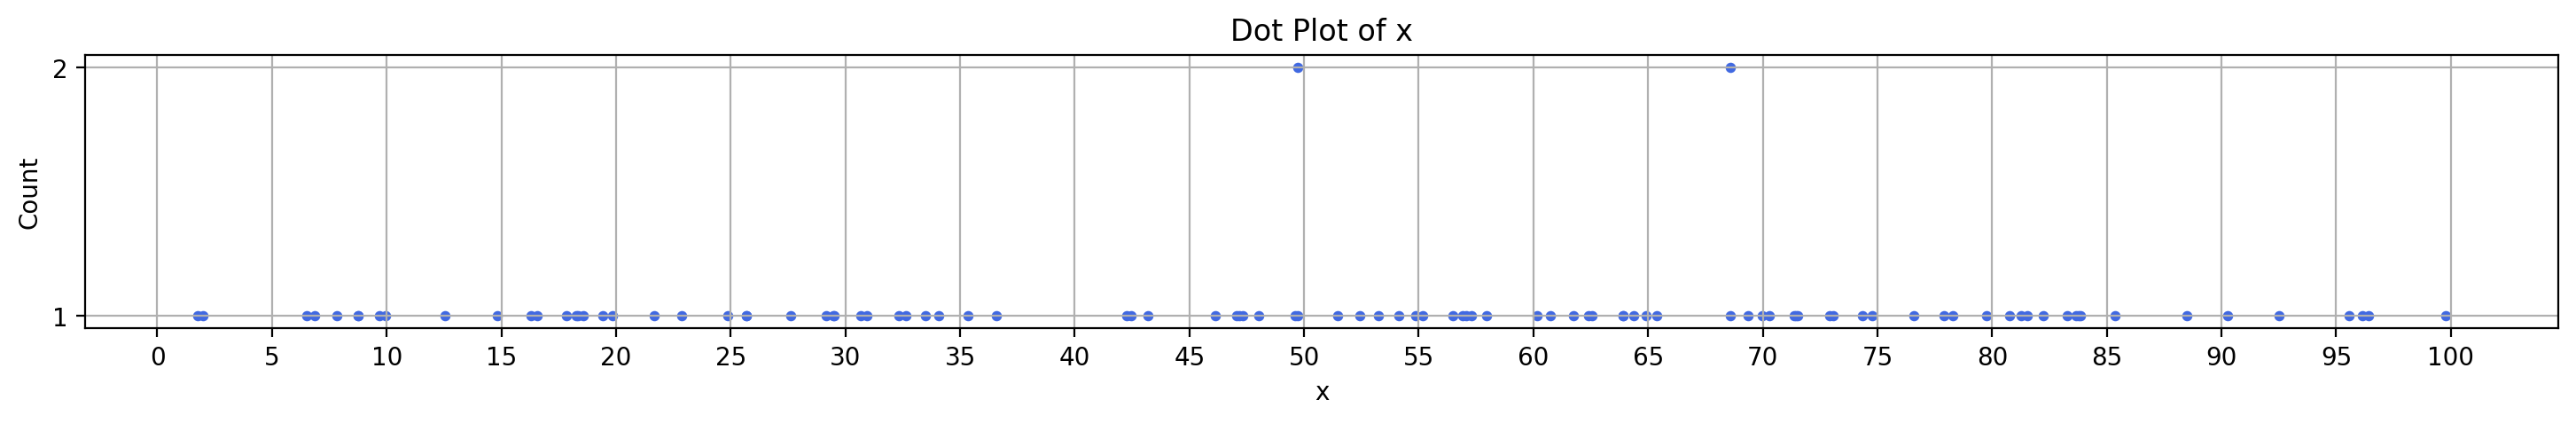

All Observations
count   100.0000000000
mean     50.6059000000
std      26.4697568647
min       1.7600000000
25%      28.7750000000
50%      53.6850000000
75%      71.4700000000
max      99.7900000000
Name: x, dtype: float64
count   100.0000000000
mean    728.0200000000
std     266.7472219238
min     300.0000000000
25%     305.0000000000
50%     888.0000000000
75%     900.0000000000
max     900.0000000000
Name: y, dtype: float64


In [4]:
# Dot plot of x
unique, count = numpy.unique(inputData['x'], return_counts = True)
plt.figure(figsize = (18,2), dpi = 200)
for u, c in zip(unique, count):
   for y in range(1,(c+1),1):
      plt.scatter(u, y, c = 'royalblue', s = 10)
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Dot Plot of x')
plt.xticks(range(0,105,5))
plt.yticks(range(0,max(count)+1,1))
plt.grid(axis = 'both')
plt.margins(x = 0.05, y = 0.05)
plt.show()

print('All Observations')
print(inputData['x'].describe())
print(inputData['y'].describe())



In [14]:
inputData['x'].value_counts(sort = False).sort_index()

subset = inputData[inputData['x'] <= 1.7600000000]
subset.shape

(1, 4)

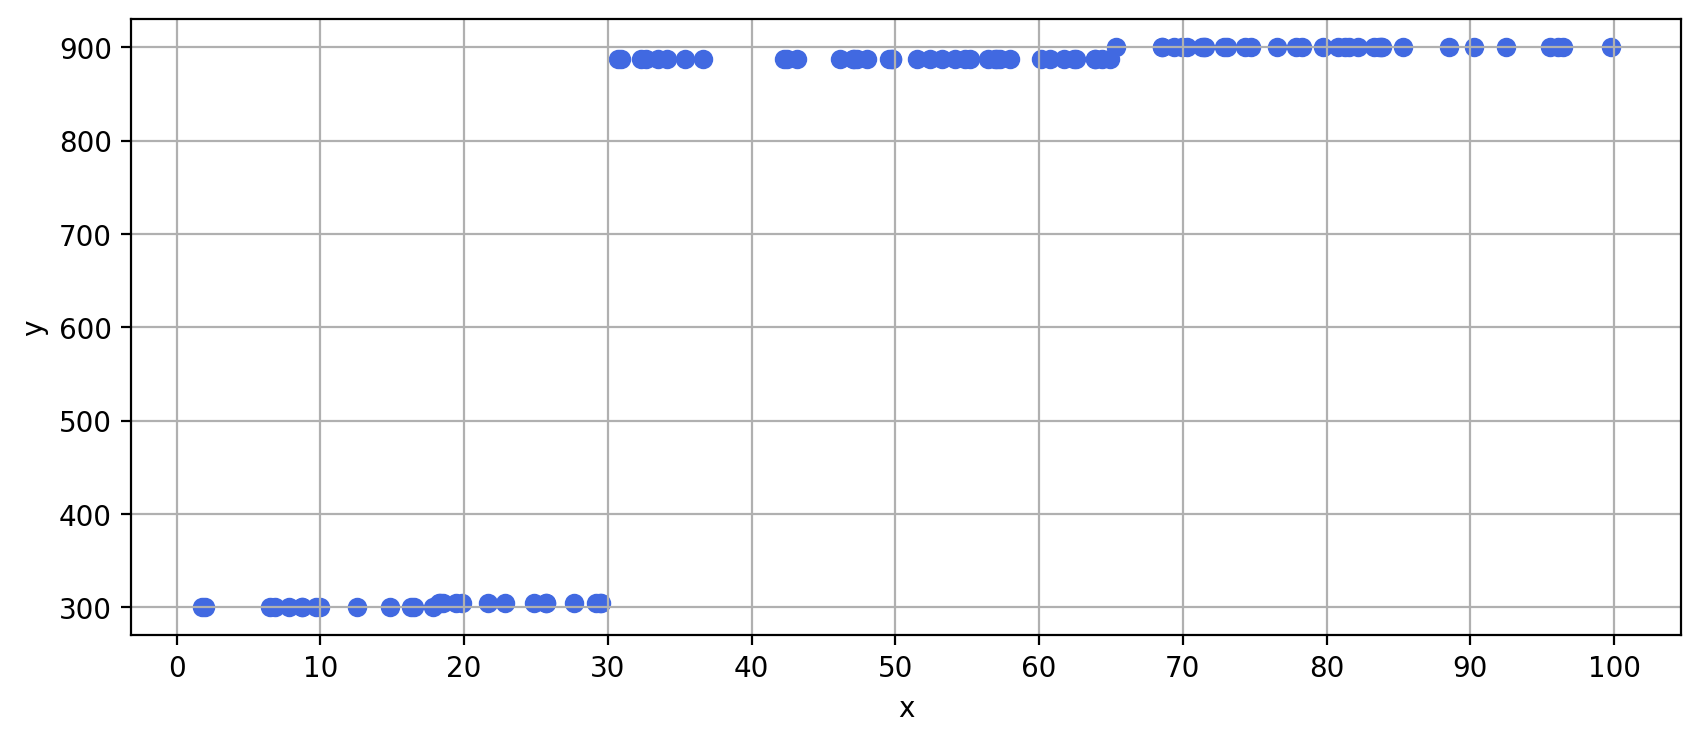

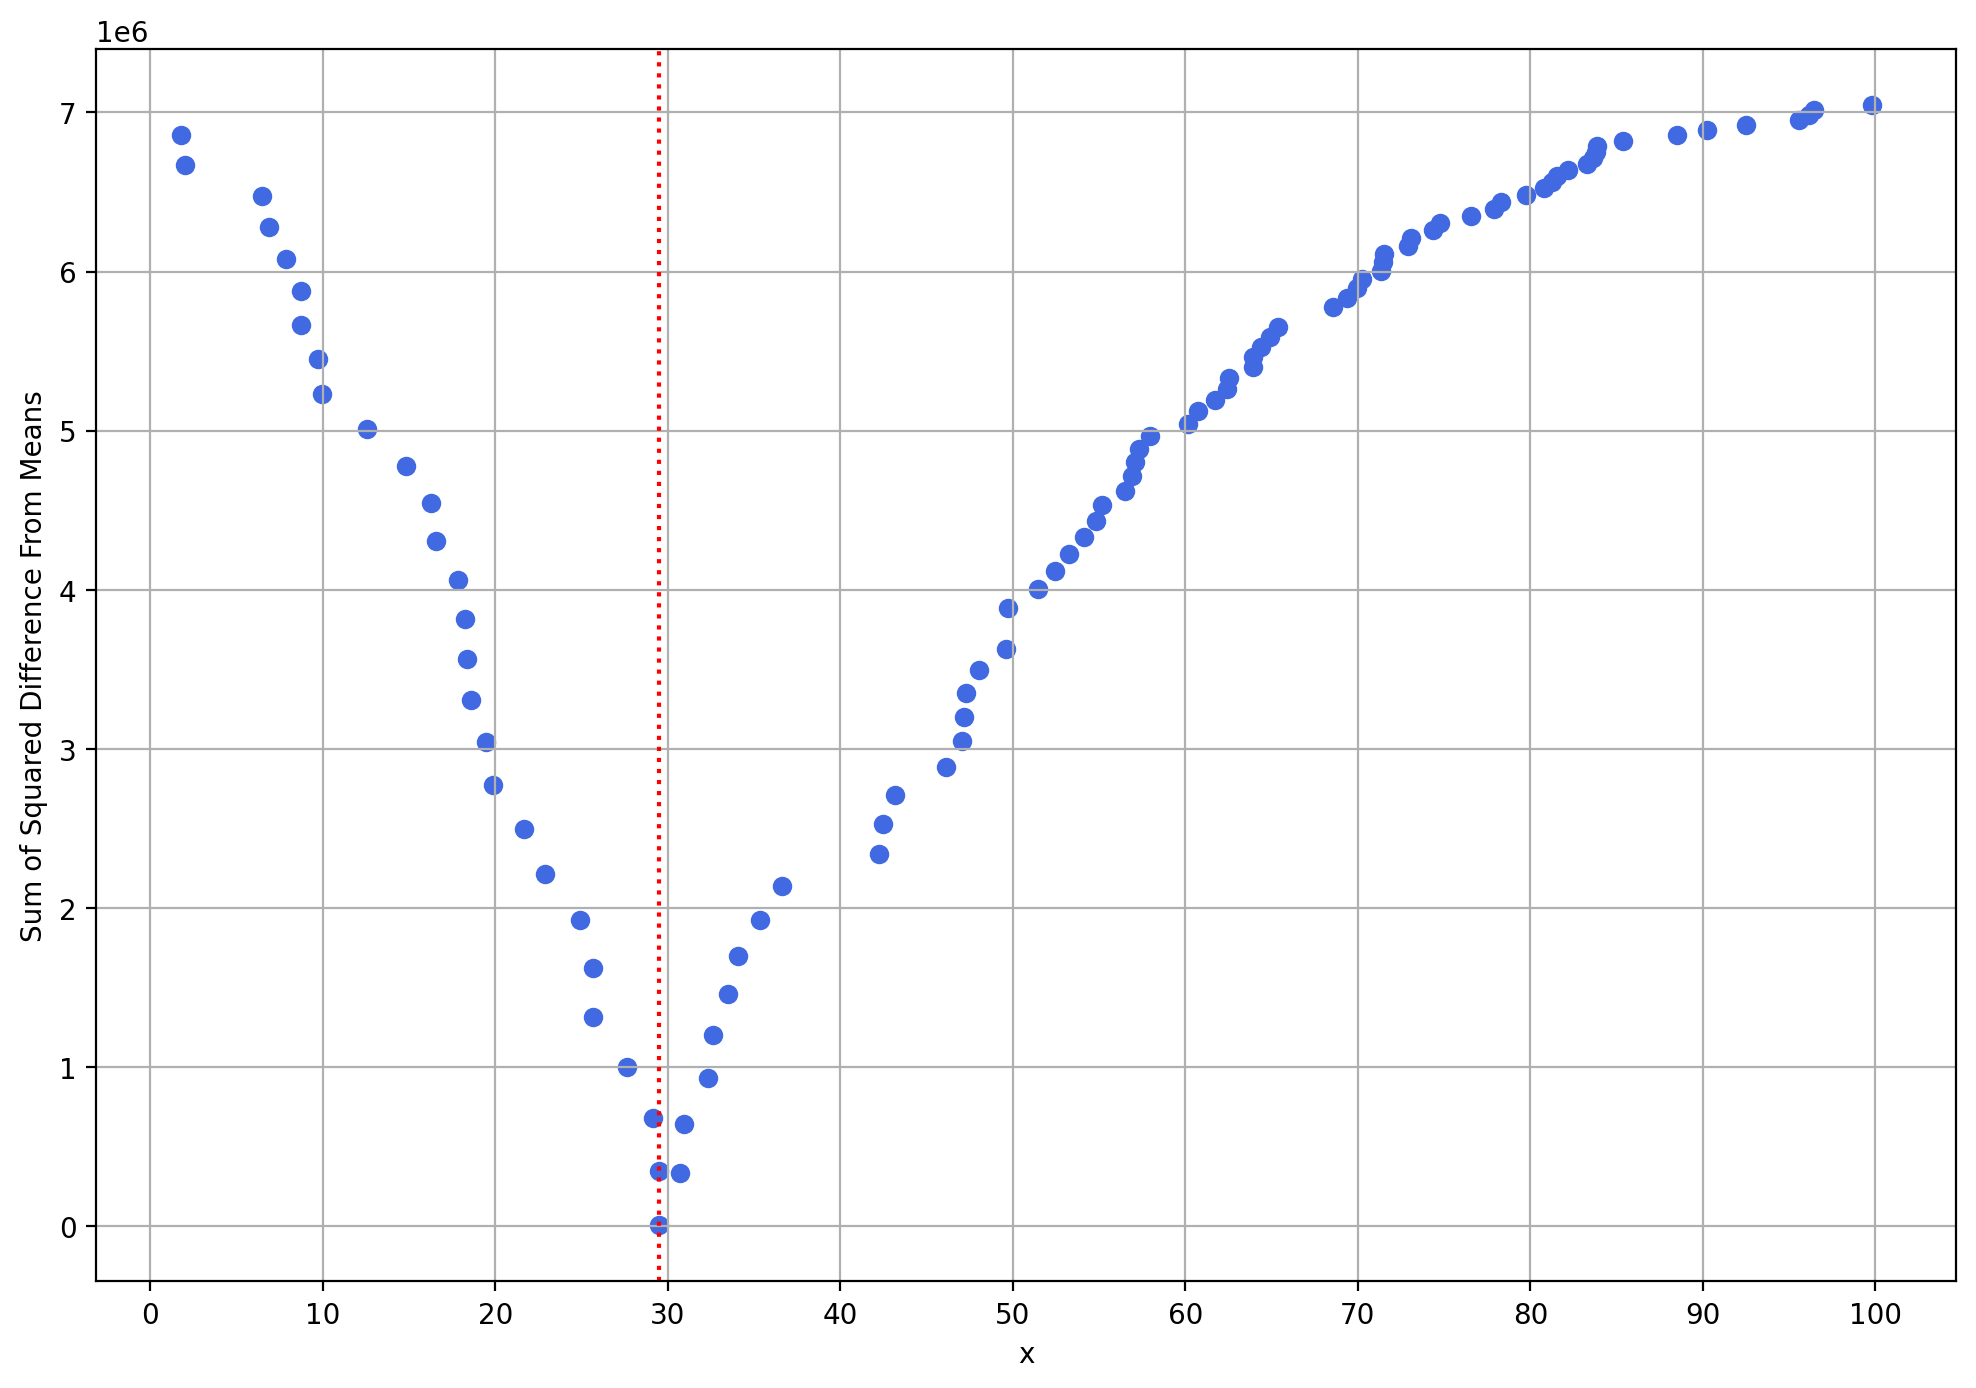

In [15]:
# Calculate the Mean Squared Error
mse_y = inputData['y'].var(ddof = 0)

# Scatterplot of y with x
plt.figure(figsize = (10,4), dpi = 200)
plt.scatter(inputData['x'], inputData['y'], c = 'royalblue', marker = 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(range(0,110,10))
plt.grid(axis = 'both')
plt.show()

# Define a function to calculate the sum of squared difference from mean
def ssdev_mean (u):
   u_diff = u - numpy.mean(u)
   return (numpy.dot(u_diff, u_diff))

# Define a function to determine the x value that optimally divide the input data
def find_optimal_split (inputDF):

   # What are the unique values of x?
   unique_x = inputDF['x'].value_counts(sort = False).sort_index()

   # Determine the optimal dividing line
   result_list = []
   for v in unique_x.index:
      ssdev = 0.0
      
      # Left subset
      subset = inputDF[inputDF['x'] <= v]
      if (subset.shape[0] > 0):
         ssdev += ssdev_mean(subset['y'])

      # Right subset
      subset = inputDF[inputDF['x'] > v]
      if (subset.shape[0] > 0):
         ssdev += ssdev_mean(subset['y'])

      result_list.append([v, ssdev])

   result_df = pandas.DataFrame(result_list, columns = ['Cutoff', 'SSDev'])

   iloc_x0 = result_df['SSDev'].argmin()
   x0 = result_df['Cutoff'].iloc[iloc_x0]
   SSDev0 = result_df['SSDev'].iloc[iloc_x0]

   return (x0, SSDev0, result_df)

# Calculate the overall sum of squared deviation from mean
SSDev_Overall = ssdev_mean(inputData['y'])

# Define a function to determine the x value that optimally divide the input data
x00, SSDev00, result_df = find_optimal_split (inputData)

plt.figure(figsize = (12,8), dpi = 200)
plt.scatter(result_df['Cutoff'], result_df['SSDev'], c = 'royalblue', marker = 'o')
plt.xlabel('x')
plt.ylabel('Sum of Squared Difference From Means')
plt.xticks(range(0,110,10))
plt.axvline(x = x00, color = 'red', linestyle = 'dotted')
plt.grid(axis = 'both')
plt.show()


Left Segment
count    28.0000000000
mean    302.5000000000
std       2.5458753861
min     300.0000000000
25%     300.0000000000
50%     302.5000000000
75%     305.0000000000
max     305.0000000000
Name: y, dtype: float64
Right Segment
count    72.0000000000
mean    893.5000000000
std       6.0210896960
min     888.0000000000
25%     888.0000000000
50%     888.0000000000
75%     900.0000000000
max     900.0000000000
Name: y, dtype: float64


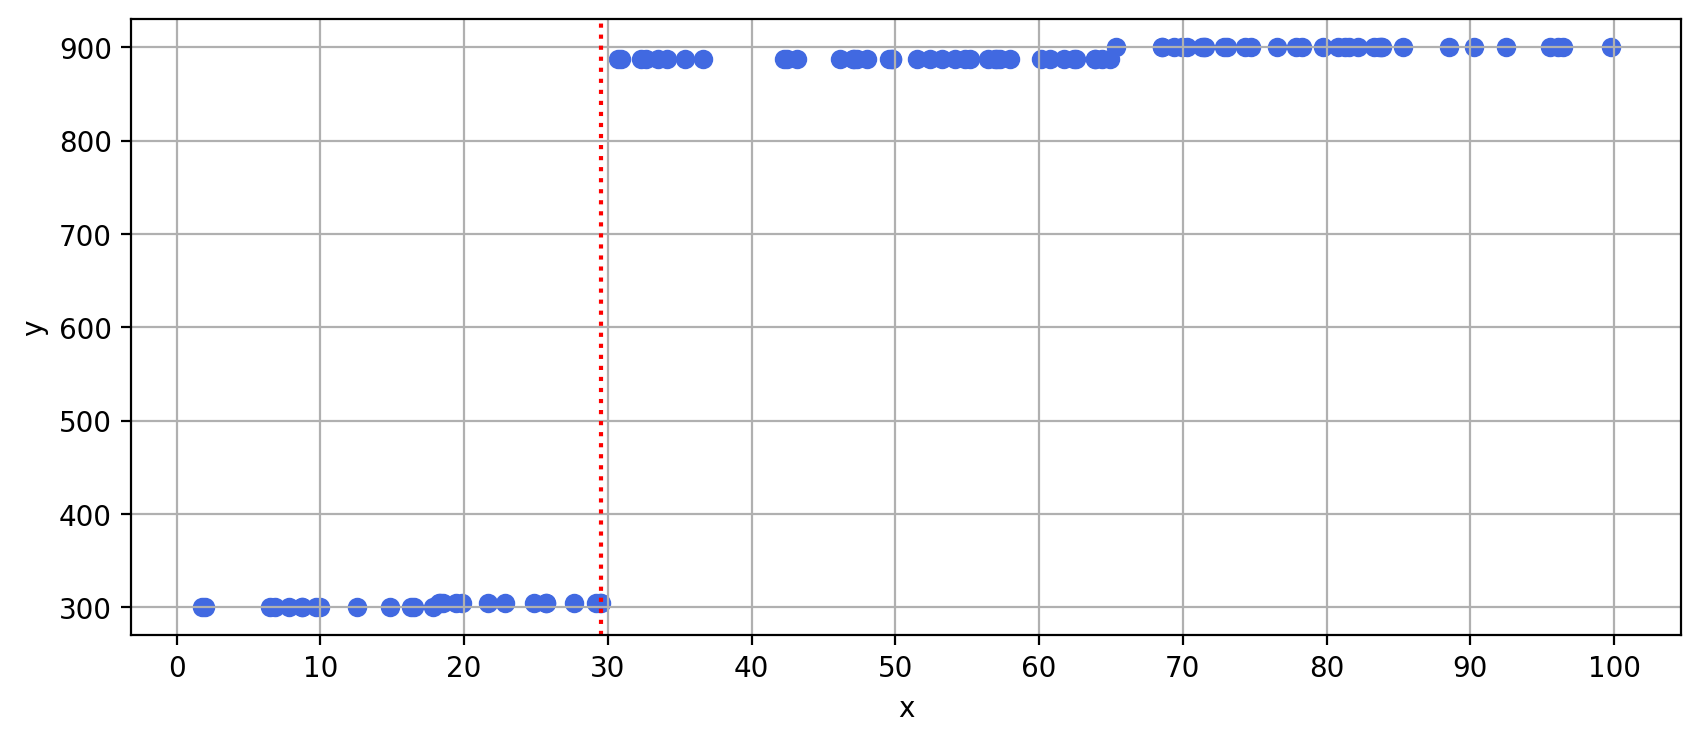

In [6]:
print('Left Segment')
print(inputData[inputData['x'] <= x00]['y'].describe())

print('Right Segment')
print(inputData[inputData['x'] > x00]['y'].describe())

plt.figure(figsize = (10,4), dpi = 200)
plt.scatter(inputData['x'], inputData['y'], c = 'royalblue', marker = 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(range(0,110,10))
plt.axvline(x = x00, color = 'red', linestyle = 'dotted')
plt.grid(axis = 'both')
plt.show()


## For Observations Where {𝒙≤𝟐𝟗.𝟓} 

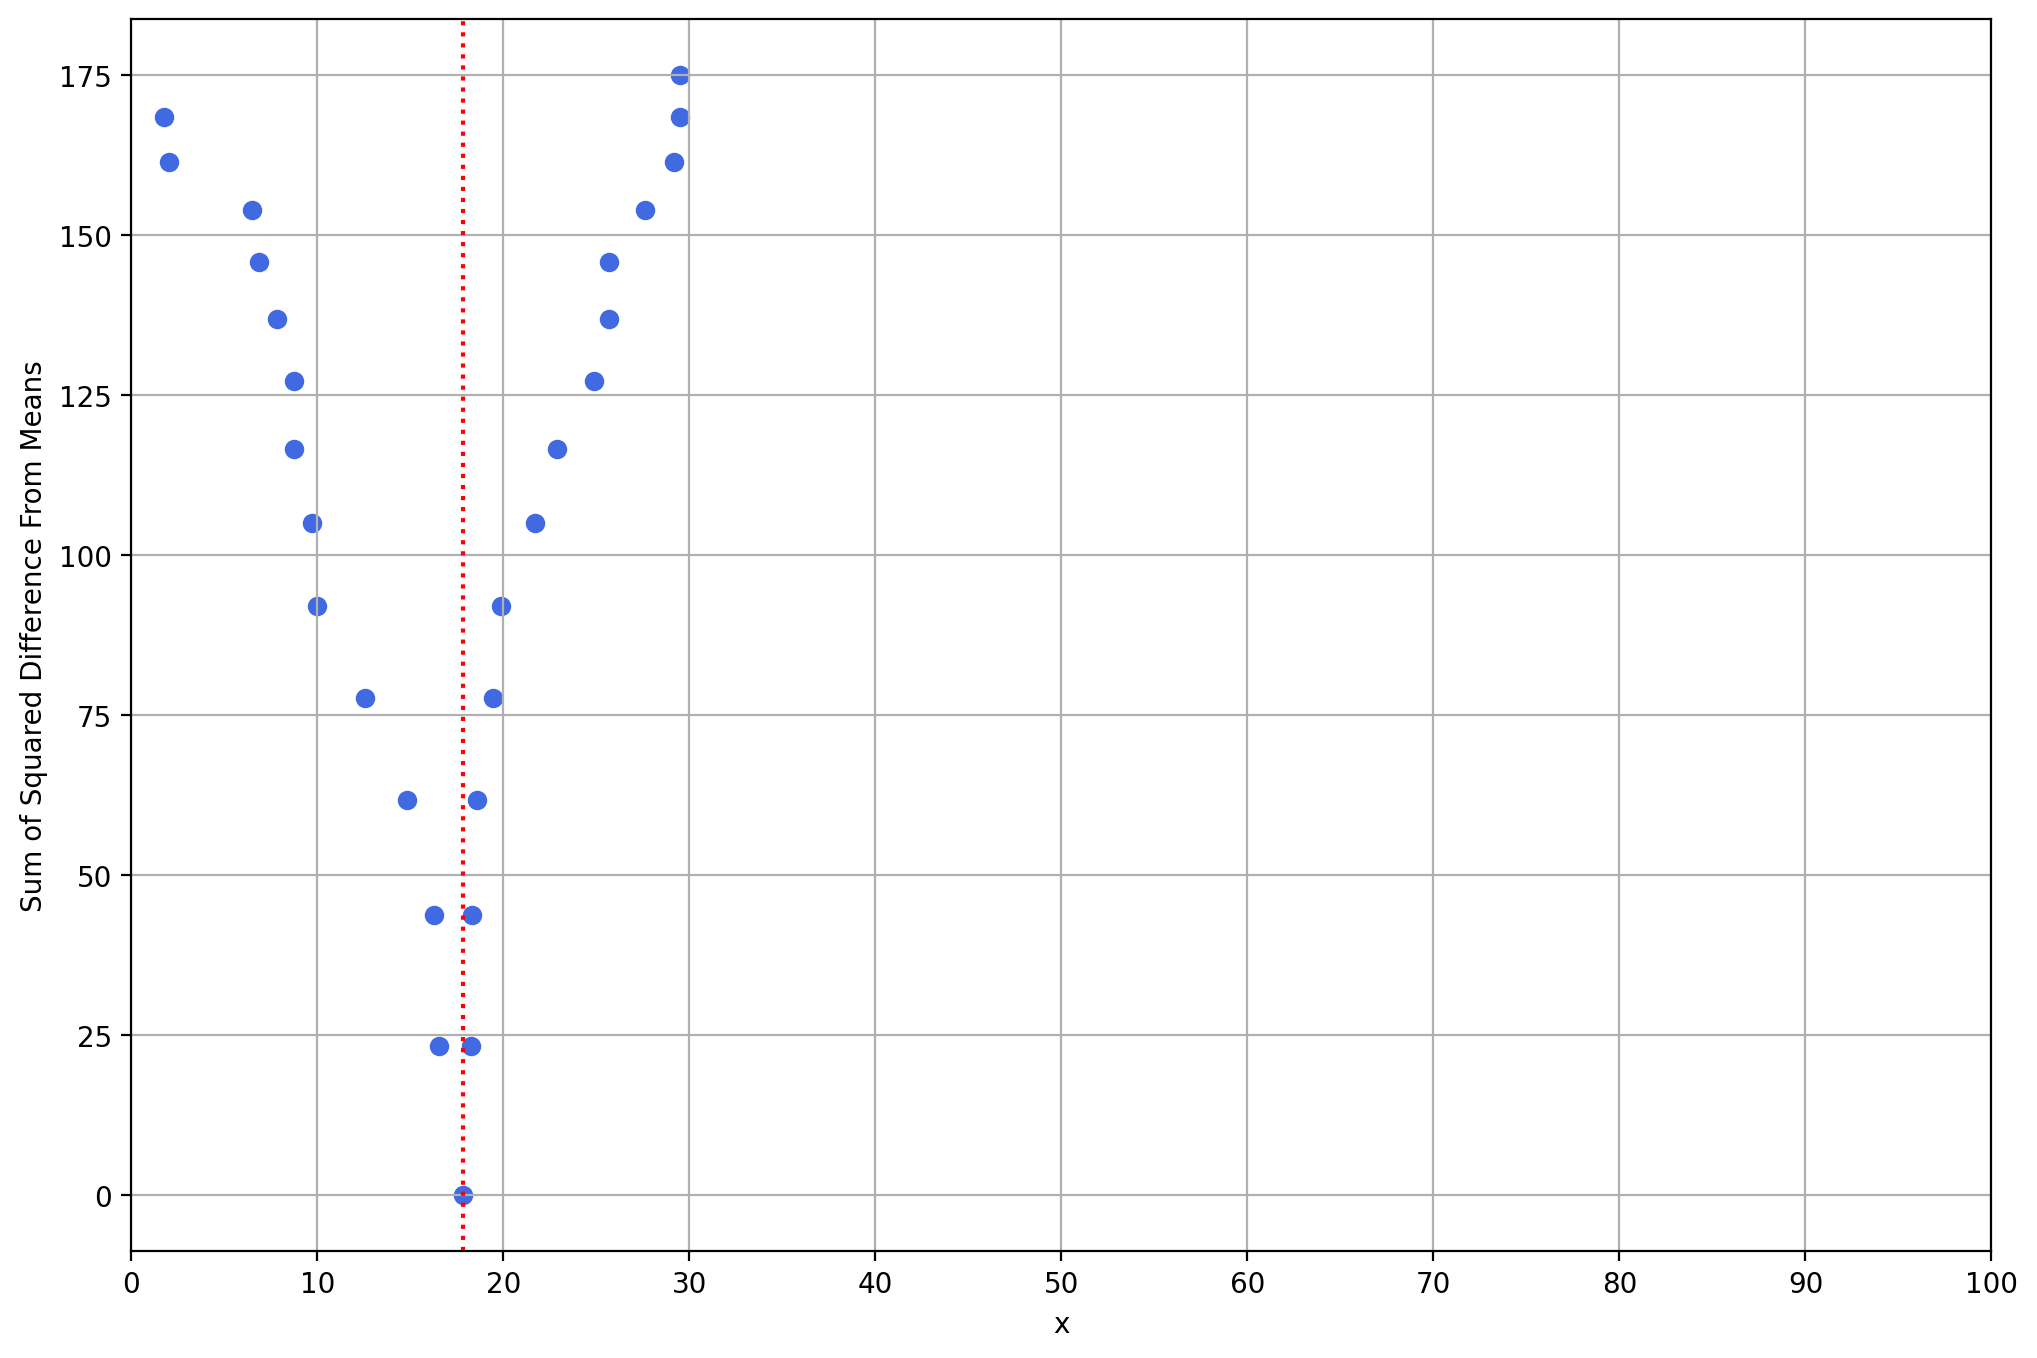

29.5

In [17]:
# x00= 29.5
# Put each segment into an individual dataframe
df_segment = inputData[inputData['x'] <= x00]

# Define a function to determine the x value that optimally divide the input data
x_10, SSDev10, result_df = find_optimal_split (df_segment)

plt.figure(figsize = (12,8), dpi = 200)
plt.scatter(result_df['Cutoff'], result_df['SSDev'], c = 'royalblue', marker = 'o')
plt.xlabel('x')
plt.ylabel('Sum of Squared Difference From Means')
plt.xticks(range(0,110,10))
plt.axvline(x = x_10, color = 'red', linestyle = 'dotted')
plt.grid(axis = 'both')
plt.show()


## For Observations Where {𝒙>𝟐𝟗.𝟓} 

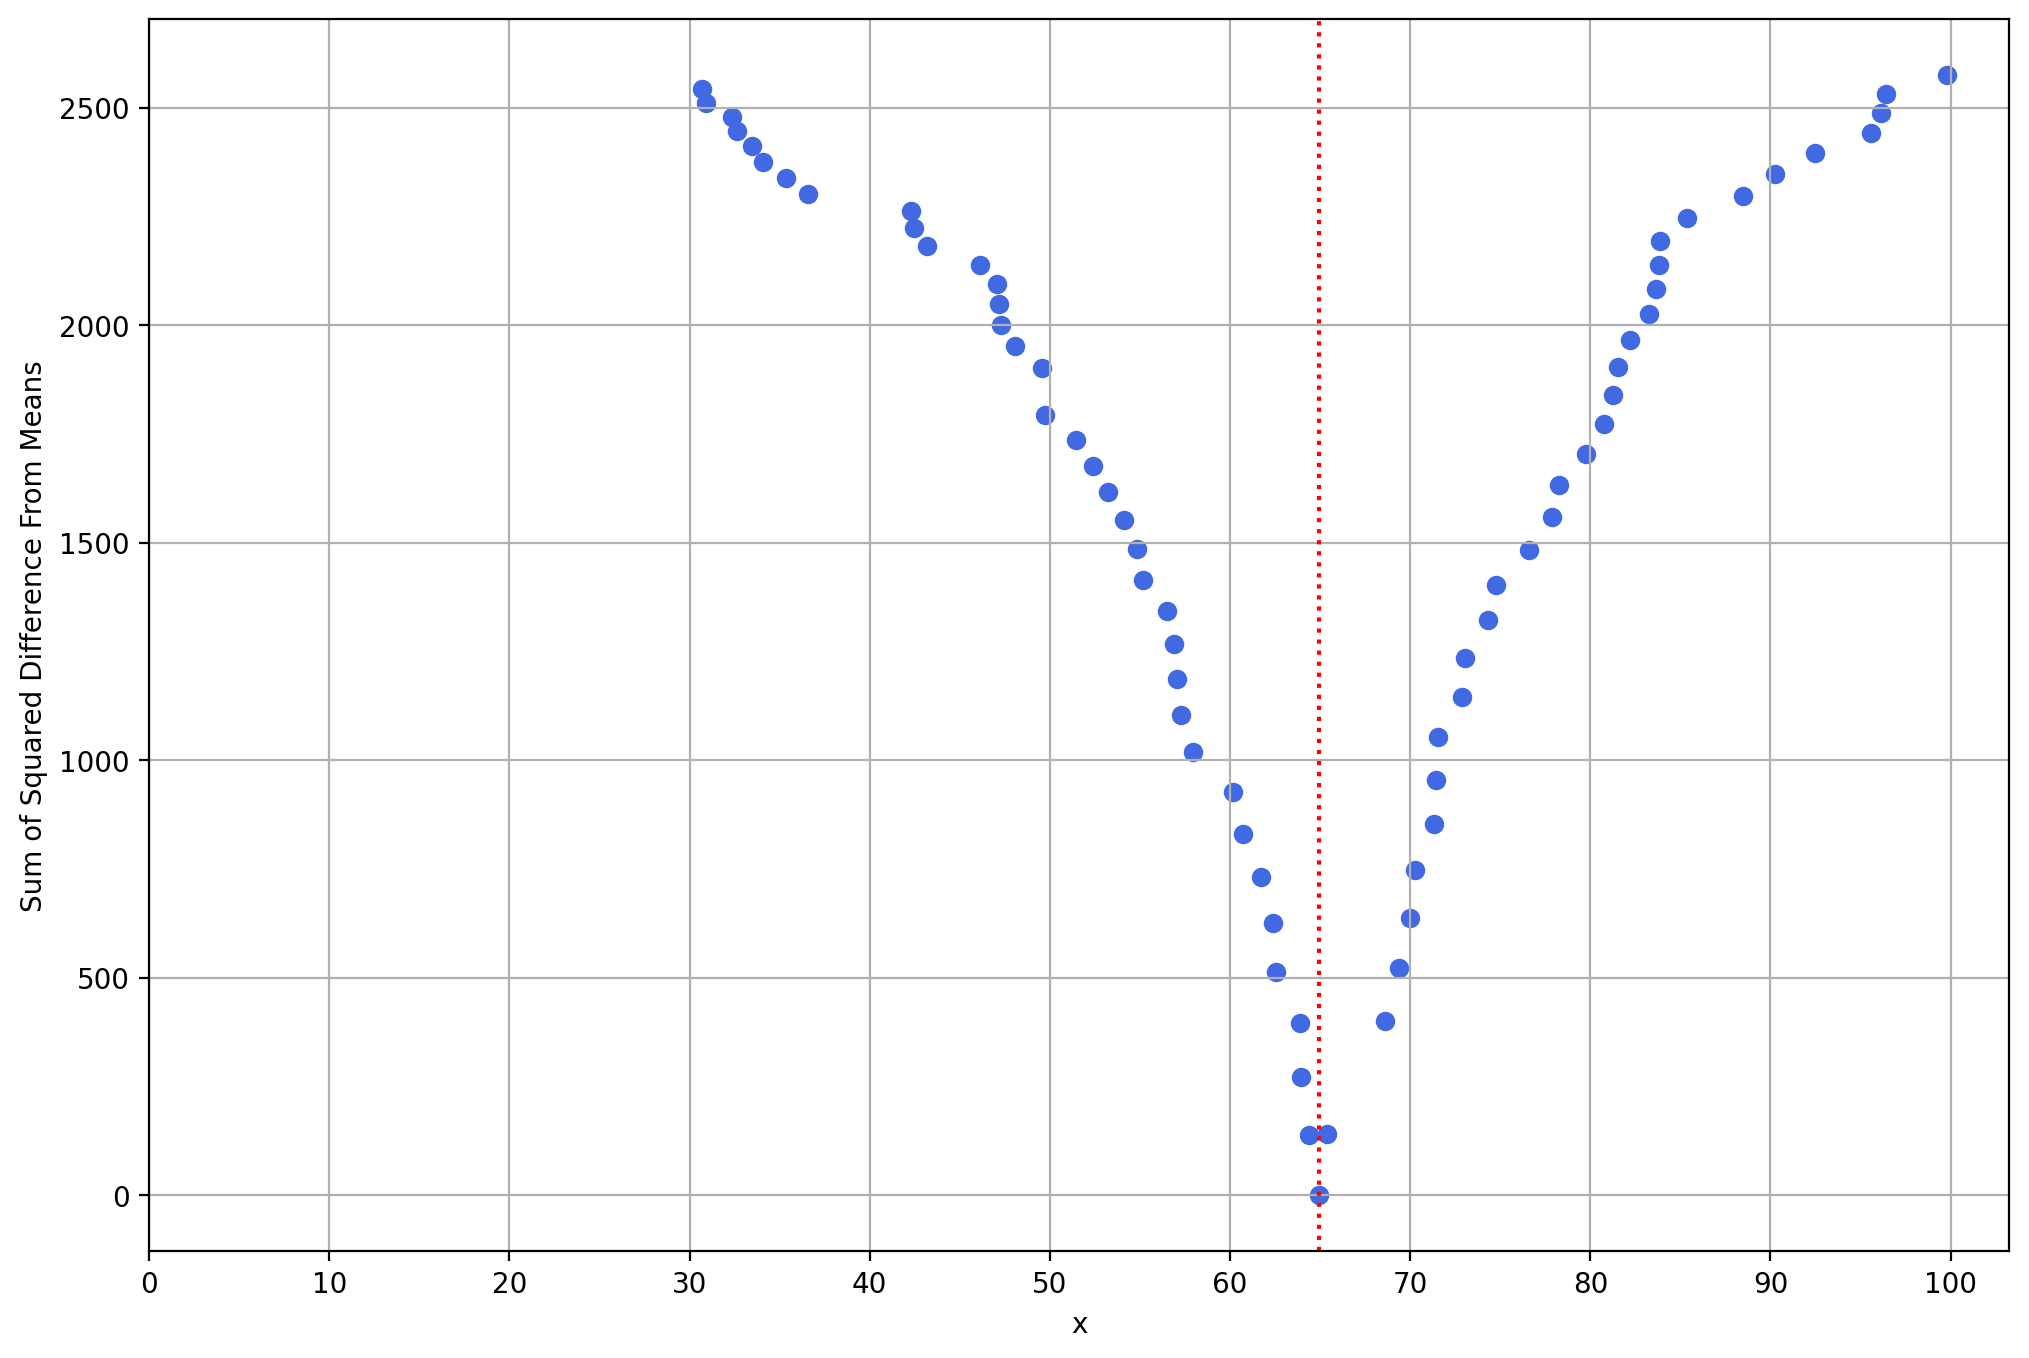

In [8]:
# x00= 29.5
# Put each segment into an individual dataframe
df_segment = inputData[inputData['x'] > x00]

# Define a function to determine the x value that optimally divide the input data
x_11, SSDev11, result_df = find_optimal_split (df_segment)

plt.figure(figsize = (12,8), dpi = 200)
plt.scatter(result_df['Cutoff'], result_df['SSDev'], c = 'royalblue', marker = 'o')
plt.xlabel('x')
plt.ylabel('Sum of Squared Difference From Means')
plt.xticks(range(0,110,10))
plt.axvline(x = x_11, color = 'red', linestyle = 'dotted')
plt.grid(axis = 'both')
plt.show()


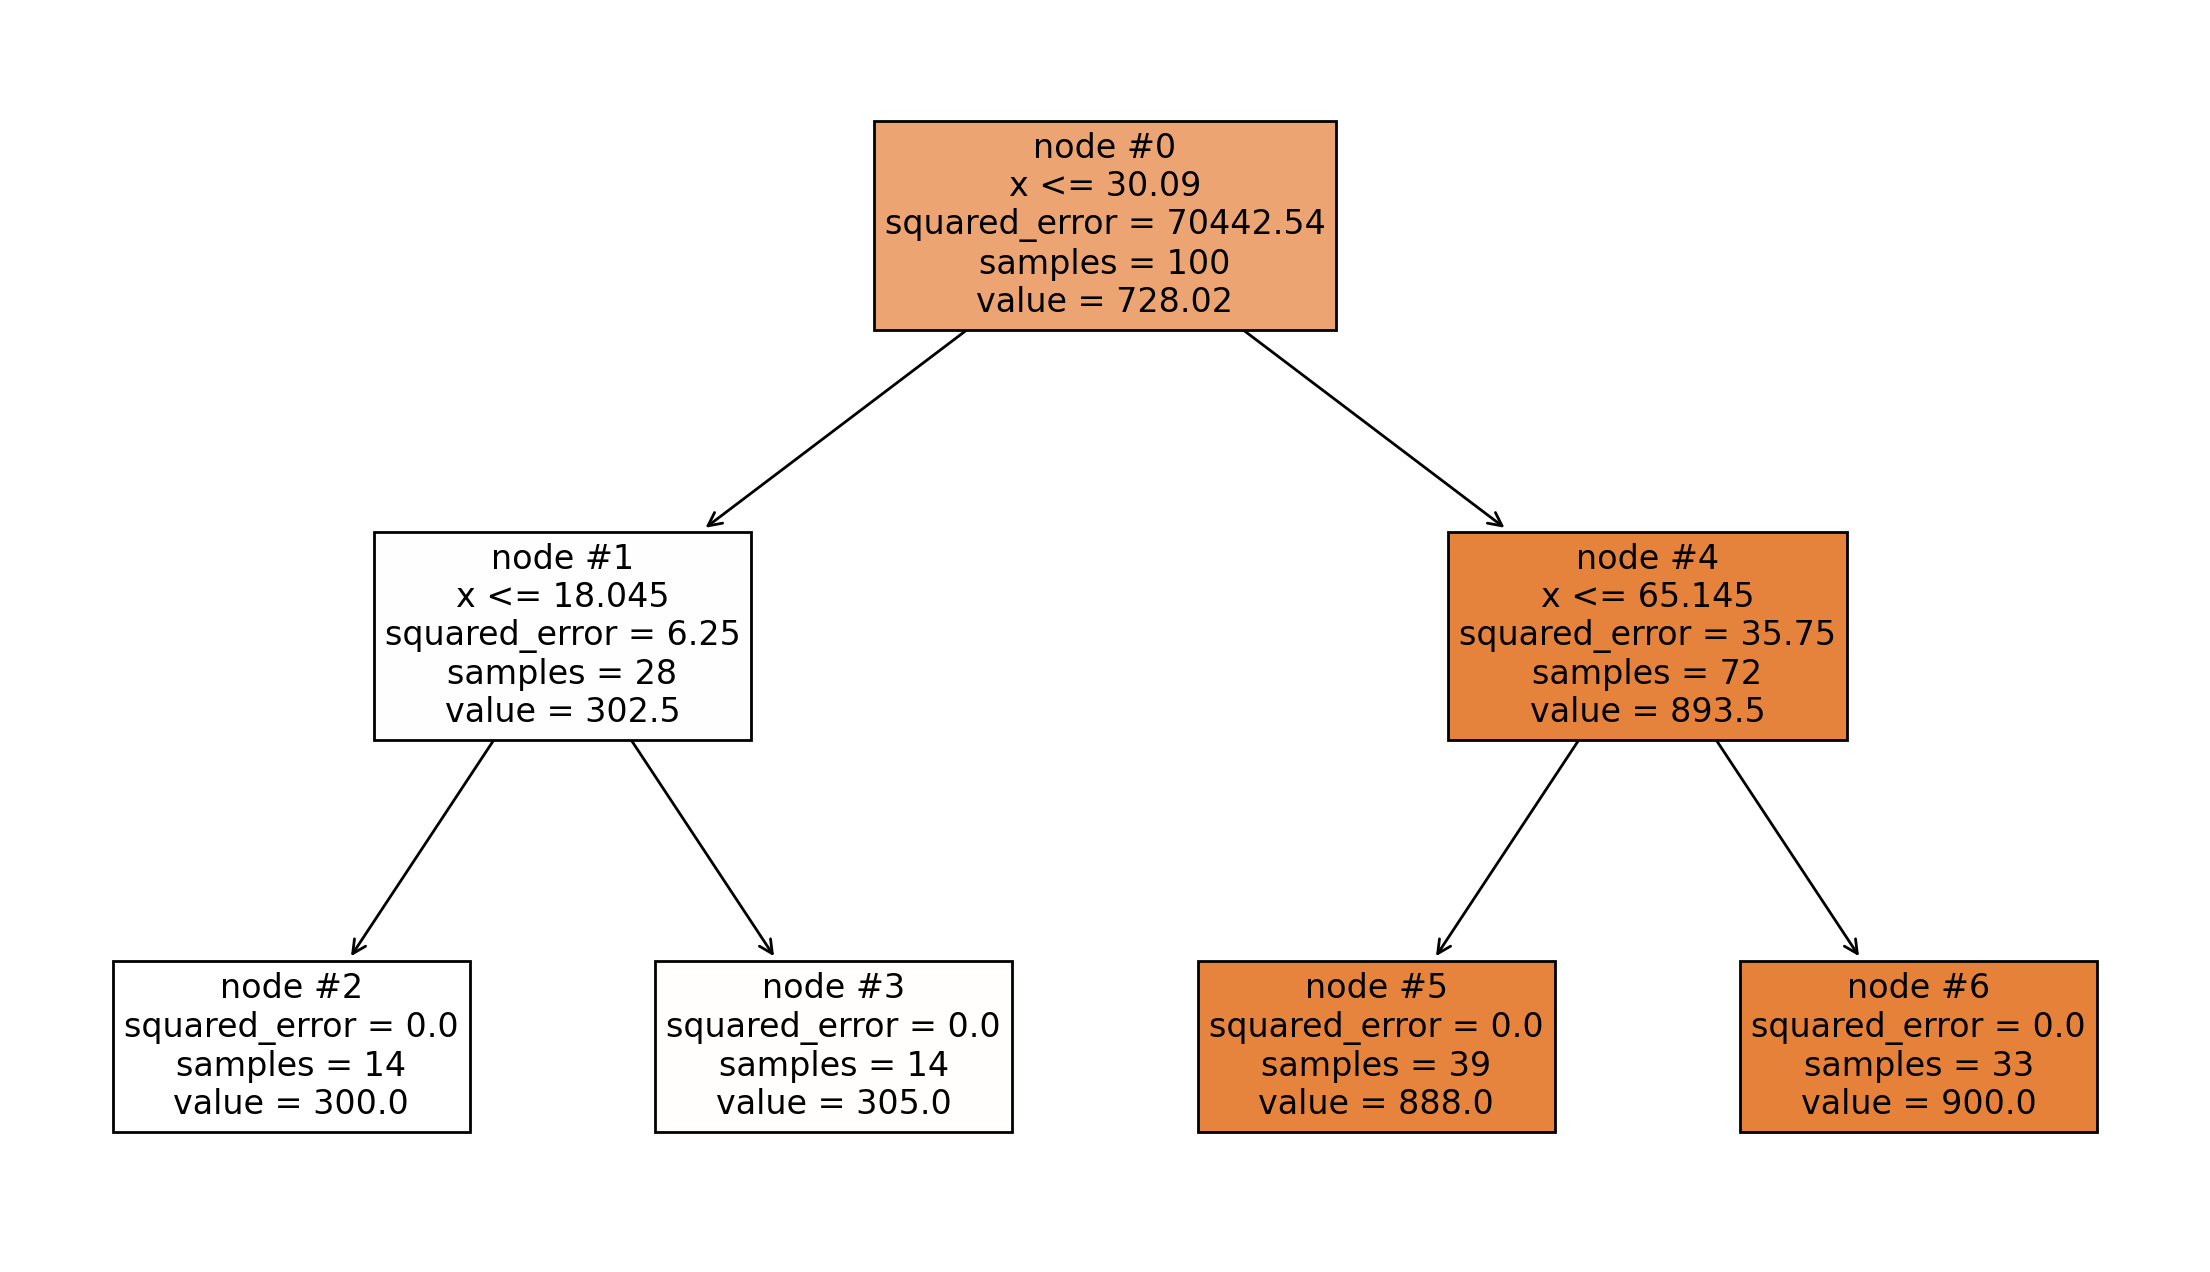

In [9]:
# Train a regression tree on y with x

regTree = tree.DecisionTreeRegressor(criterion = 'squared_error',
                                     max_depth = None, random_state = 2023484)
model = regTree.fit(inputData[['x']], inputData['y'])

fig, ax = plt.subplots(1, 1, figsize = (14,8), dpi = 200)
tree.plot_tree(model, feature_names = ['x'], label = 'all',
               filled = True, impurity = True, node_ids = True,
               rounded = False, precision = 3, ax = ax, fontsize = 12)
plt.show()


# Week 6 HMEQ CART.py

In [2]:


import matplotlib.pyplot as plt
import numpy
import pandas
import sys

from matplotlib import ticker as mticker
from sklearn import tree

# Set some options for printing all the columns
numpy.set_printoptions(precision = 10, threshold = sys.maxsize)
numpy.set_printoptions(linewidth = numpy.inf)

pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)

pandas.options.display.float_format = '{:,.10f}'.format

# Define a function to visualize the percent of a particular target category by a nominal predictor
def TargetPercentByNominal (
   targetVar,       # target variable
   targetCat,       # target category
   predictor,       # nominal predictor
   val4na):         # imputed value for NaN

   crossTable = pandas.crosstab(index = predictor.fillna(val4na), columns = targetVar, margins = True, dropna = True)
   crossTable['Percent'] = 100 * (crossTable[targetCat] / crossTable['All'])
   print(crossTable)

   plotTable = crossTable[crossTable.index != 'All']
   plt.bar(plotTable.index, plotTable['Percent'])
   plt.xlabel(predictor.name)
   plt.ylabel('Percent of ' + targetVar.name + ' = ' + str(targetCat))
   plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
   plt.grid(True, axis='y')
   plt.show()

   return(crossTable)

# Define a function to visualize the percent of a particular target category by an interval predictor
def TargetPercentByInterval (
   targetVar,       # target variable
   targetCat,       # target category
   predictor,       # nominal predictor
   val4na):         # imputed value for NaN

   crossTable = pandas.crosstab(index = predictor.fillna(val4na), columns = targetVar, margins = True, dropna = True)
   crossTable['Percent'] = 100 * (crossTable[targetCat] / crossTable['All'])
   print(crossTable)

   plotTable = crossTable[crossTable.index != 'All']
   plt.scatter(plotTable.index, plotTable['Percent'])
   plt.xlabel(predictor.name)
   plt.ylabel('Percent of ' + targetVar.name + ' = ' + str(targetCat))
   plt.grid(True, axis='both')
   plt.show()

   return(crossTable)

hmeq = pandas.read_csv('hmeq.csv', delimiter=',')
nTotal = hmeq.shape[0]


In [4]:
nTotal

5960

In [3]:
hmeq

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,"25,860.0000000000","39,025.0000000000",HomeImp,Other,10.5000000000,0.0000000000,0.0000000000,94.3666666670,1.0000000000,9.0000000000,NaN
1,1,1300,"70,053.0000000000","68,400.0000000000",HomeImp,Other,7.0000000000,0.0000000000,2.0000000000,121.8333333300,0.0000000000,14.0000000000,NaN
2,1,1500,"13,500.0000000000","16,700.0000000000",HomeImp,Other,4.0000000000,0.0000000000,0.0000000000,149.4666666700,1.0000000000,10.0000000000,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,"97,800.0000000000","112,000.0000000000",HomeImp,Office,3.0000000000,0.0000000000,0.0000000000,93.3333333330,0.0000000000,14.0000000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,"57,264.0000000000","90,185.0000000000",DebtCon,Other,16.0000000000,0.0000000000,0.0000000000,221.8087175400,0.0000000000,16.0000000000,36.1123465190
5956,0,89000,"54,576.0000000000","92,937.0000000000",DebtCon,Other,16.0000000000,0.0000000000,0.0000000000,208.6920698200,0.0000000000,15.0000000000,35.8599706810
5957,0,89200,"54,045.0000000000","92,924.0000000000",DebtCon,Other,15.0000000000,0.0000000000,0.0000000000,212.2796966700,0.0000000000,15.0000000000,35.5565904900
5958,0,89800,"50,370.0000000000","91,861.0000000000",DebtCon,Other,14.0000000000,0.0000000000,0.0000000000,213.8927090100,0.0000000000,16.0000000000,34.3408823680


col_0  Count        Percent
BAD                        
0       4771  80.0503355705
1       1189  19.9496644295
All     5960 100.0000000000


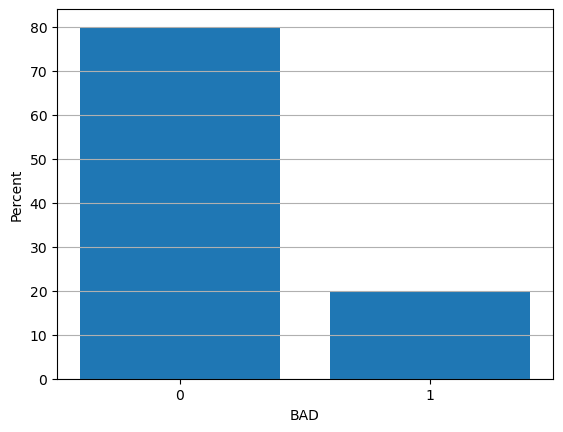

BAD        0     1   All        Percent
DELINQ                                 
-1.0     508    72   580  12.4137931034
0.0     3596   583  4179  13.9507059105
1.0      432   222   654  33.9449541284
2.0      138   112   250  44.8000000000
3.0       58    71   129  55.0387596899
4.0       32    46    78  58.9743589744
5.0        7    31    38  81.5789473684
6.0        0    27    27 100.0000000000
7.0        0    13    13 100.0000000000
8.0        0     5     5 100.0000000000
10.0       0     2     2 100.0000000000
11.0       0     2     2 100.0000000000
12.0       0     1     1 100.0000000000
13.0       0     1     1 100.0000000000
15.0       0     1     1 100.0000000000
All     4771  1189  5960  19.9496644295


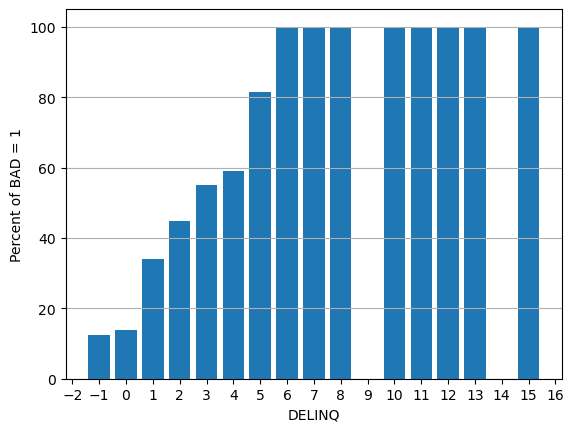

BAD       0     1   All        Percent
DEROG                                 
-1.0    621    87   708  12.2881355932
0.0    3773   754  4527  16.6556218246
1.0     266   169   435  38.8505747126
2.0      78    82   160  51.2500000000
3.0      15    43    58  74.1379310345
4.0       5    18    23  78.2608695652
5.0       8     7    15  46.6666666667
6.0       5    10    15  66.6666666667
7.0       0     8     8 100.0000000000
8.0       0     6     6 100.0000000000
9.0       0     3     3 100.0000000000
10.0      0     2     2 100.0000000000
All    4771  1189  5960  19.9496644295


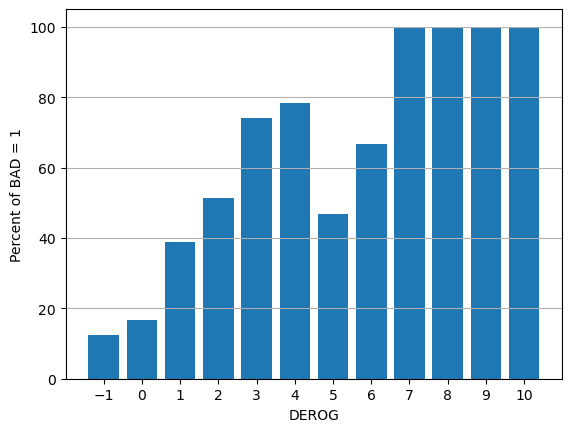

BAD         0     1   All       Percent
JOB                                    
Mgr       588   179   767 23.3376792699
Office    823   125   948 13.1856540084
Other    1834   554  2388 23.1993299832
ProfExe  1064   212  1276 16.6144200627
Sales      71    38   109 34.8623853211
Self      135    58   193 30.0518134715
Unknown   256    23   279  8.2437275986
All      4771  1189  5960 19.9496644295


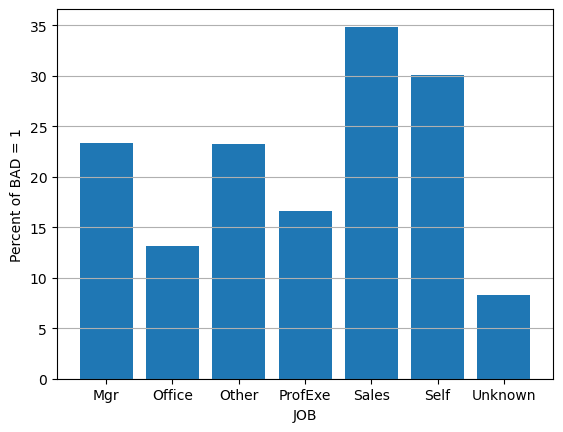

BAD      0     1   All        Percent
NINQ                                 
-1.0   435    75   510  14.7058823529
0.0   2135   396  2531  15.6459897274
1.0   1085   254  1339  18.9693801344
2.0    599   181   780  23.2051282051
3.0    285   107   392  27.2959183673
4.0     95    61   156  39.1025641026
5.0     39    36    75  48.0000000000
6.0     27    29    56  51.7857142857
7.0     29    15    44  34.0909090909
8.0     11    11    22  50.0000000000
9.0      5     6    11  54.5454545455
10.0    19     9    28  32.1428571429
11.0     7     3    10  30.0000000000
12.0     0     2     2 100.0000000000
13.0     0     2     2 100.0000000000
14.0     0     1     1 100.0000000000
17.0     0     1     1 100.0000000000
All   4771  1189  5960  19.9496644295


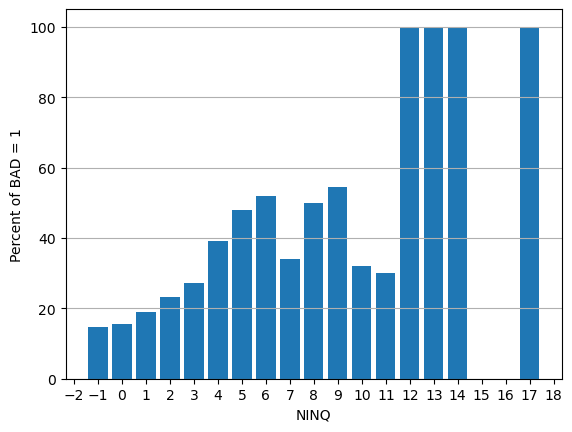

BAD         0     1   All       Percent
REASON                                 
DebtCon  3183   745  3928 18.9663951120
HomeImp  1384   396  1780 22.2471910112
Unknown   204    48   252 19.0476190476
All      4771  1189  5960 19.9496644295


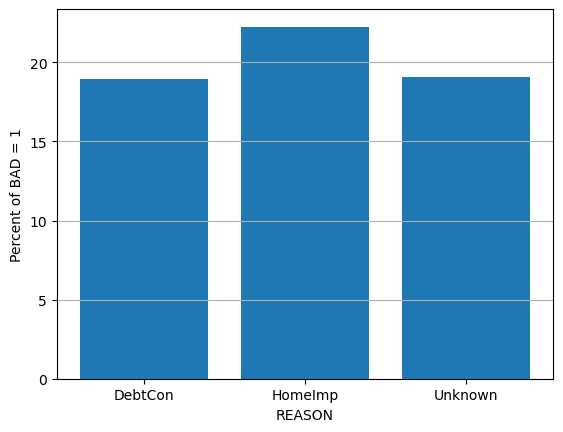

BAD              0     1   All        Percent
DEBTINC                                      
-10.0          481   786  1267  62.0363062352
0.5244992154     0     1     1 100.0000000000
0.7202950067     1     0     1   0.0000000000
0.8381175254     0     1     1 100.0000000000
1.0289309682     0     1     1 100.0000000000
...            ...   ...   ...            ...
133.52827043     0     1     1 100.0000000000
143.94960495     0     1     1 100.0000000000
144.18900129     0     1     1 100.0000000000
203.31214869     0     1     1 100.0000000000
All           4771  1189  5960  19.9496644295

[4695 rows x 4 columns]


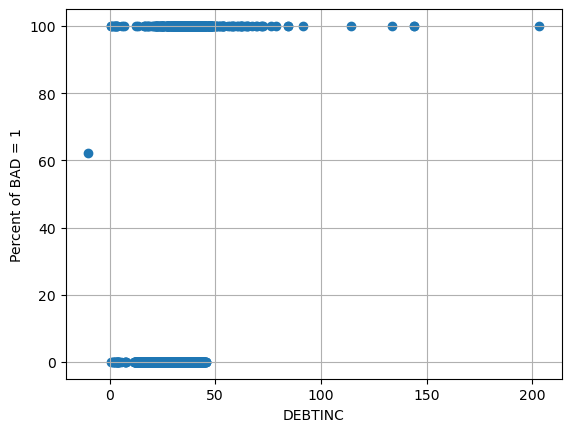

BAD              0     1   All        Percent
CLAGE                                        
-10.0          230    78   308  25.3246753247
0.0              0     2     2 100.0000000000
0.4867114508     1     0     1   0.0000000000
0.5071145295     1     0     1   0.0000000000
2.0333333333     0     1     1 100.0000000000
...            ...   ...   ...            ...
648.32849259     1     0     1   0.0000000000
649.74710438     1     0     1   0.0000000000
1154.6333333     0     1     1 100.0000000000
1168.2335609     0     1     1 100.0000000000
All           4771  1189  5960  19.9496644295

[5316 rows x 4 columns]


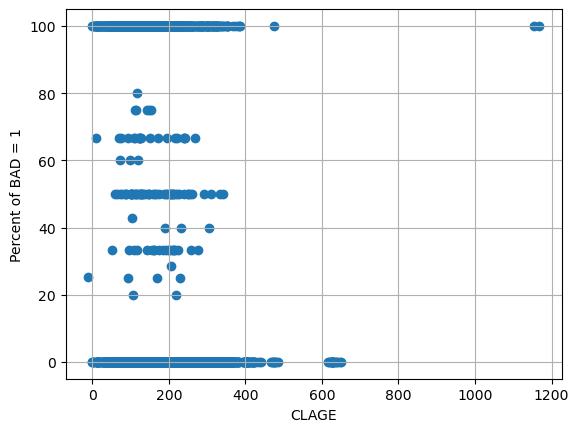

BAD       0     1   All        Percent
CLNO                                  
-10.0   169    53   222  23.8738738739
0.0      37    25    62  40.3225806452
1.0       1     5     6  83.3333333333
2.0       0    15    15 100.0000000000
3.0      21    13    34  38.2352941176
...     ...   ...   ...            ...
63.0      0     1     1 100.0000000000
64.0      0     5     5 100.0000000000
65.0      0     3     3 100.0000000000
71.0      0     2     2 100.0000000000
All    4771  1189  5960  19.9496644295

[64 rows x 4 columns]


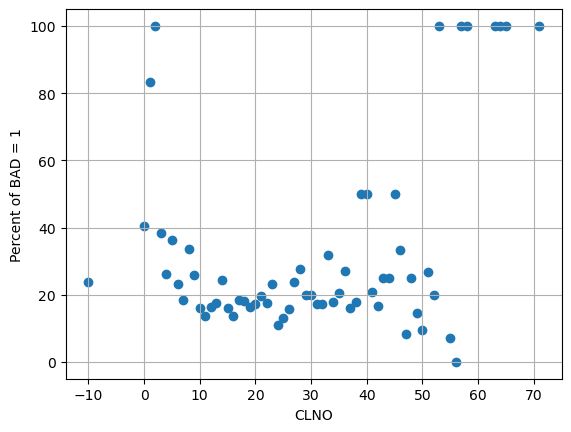

BAD       0     1   All        Percent
LOAN                                  
1100      0     1     1 100.0000000000
1300      0     1     1 100.0000000000
1500      0     2     2 100.0000000000
1700      1     1     2  50.0000000000
1800      0     2     2 100.0000000000
...     ...   ...   ...            ...
89000     1     0     1   0.0000000000
89200     1     0     1   0.0000000000
89800     1     0     1   0.0000000000
89900     1     0     1   0.0000000000
All    4771  1189  5960  19.9496644295

[541 rows x 4 columns]


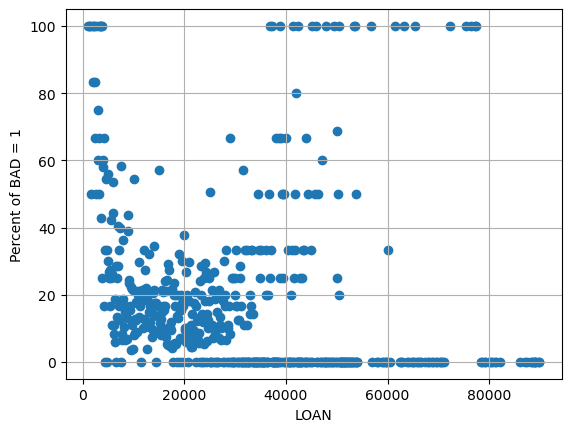

BAD          0     1   All        Percent
MORTDUE                                  
-10.0      412   106   518  20.4633204633
2063.0       0     1     1 100.0000000000
2619.0       1     0     1   0.0000000000
2800.0       0     1     1 100.0000000000
3372.0       0     1     1 100.0000000000
...        ...   ...   ...            ...
391000.0     0     1     1 100.0000000000
397299.0     0     1     1 100.0000000000
399412.0     0     1     1 100.0000000000
399550.0     0     1     1 100.0000000000
All       4771  1189  5960  19.9496644295

[5055 rows x 4 columns]


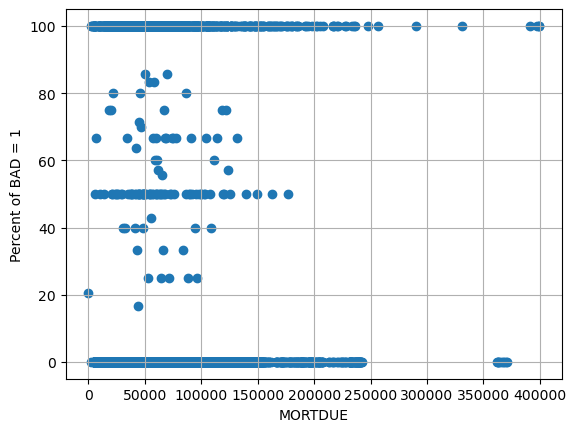

BAD          0     1   All        Percent
VALUE                                    
-10.0        7   105   112  93.7500000000
8000.0       1     0     1   0.0000000000
8800.0       0     1     1 100.0000000000
9100.0       0     1     1 100.0000000000
9500.0       0     1     1 100.0000000000
...        ...   ...   ...            ...
850000.0     0     1     1 100.0000000000
854112.0     0     1     1 100.0000000000
854114.0     0     1     1 100.0000000000
855909.0     0     1     1 100.0000000000
All       4771  1189  5960  19.9496644295

[5383 rows x 4 columns]


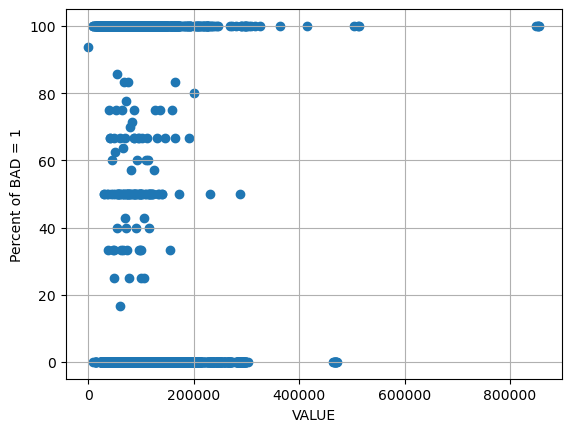

BAD       0     1   All        Percent
YOJ                                   
-10.0   450    65   515  12.6213592233
0.0     357    58   415  13.9759036145
0.1       3    11    14  78.5714285714
0.2       5     5    10  50.0000000000
0.25      0     1     1 100.0000000000
...     ...   ...   ...            ...
34.0      1     1     2  50.0000000000
35.0      5     0     5   0.0000000000
36.0      5     0     5   0.0000000000
41.0      0     3     3 100.0000000000
All    4771  1189  5960  19.9496644295

[101 rows x 4 columns]


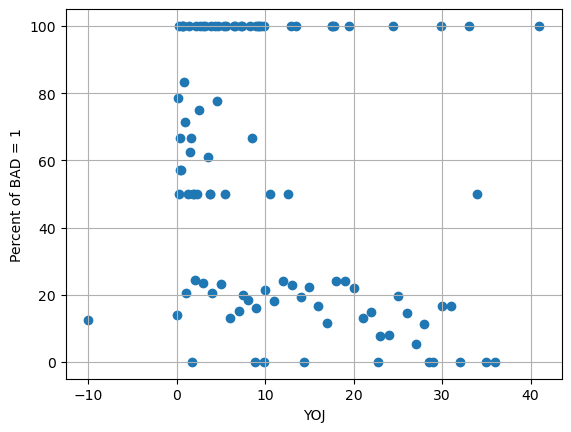

Number of Missing Observations:
DEBTINC    0
DELINQ     0
dtype: int64
0
Accuracy of Decision Tree classifier on training set: 0.926488


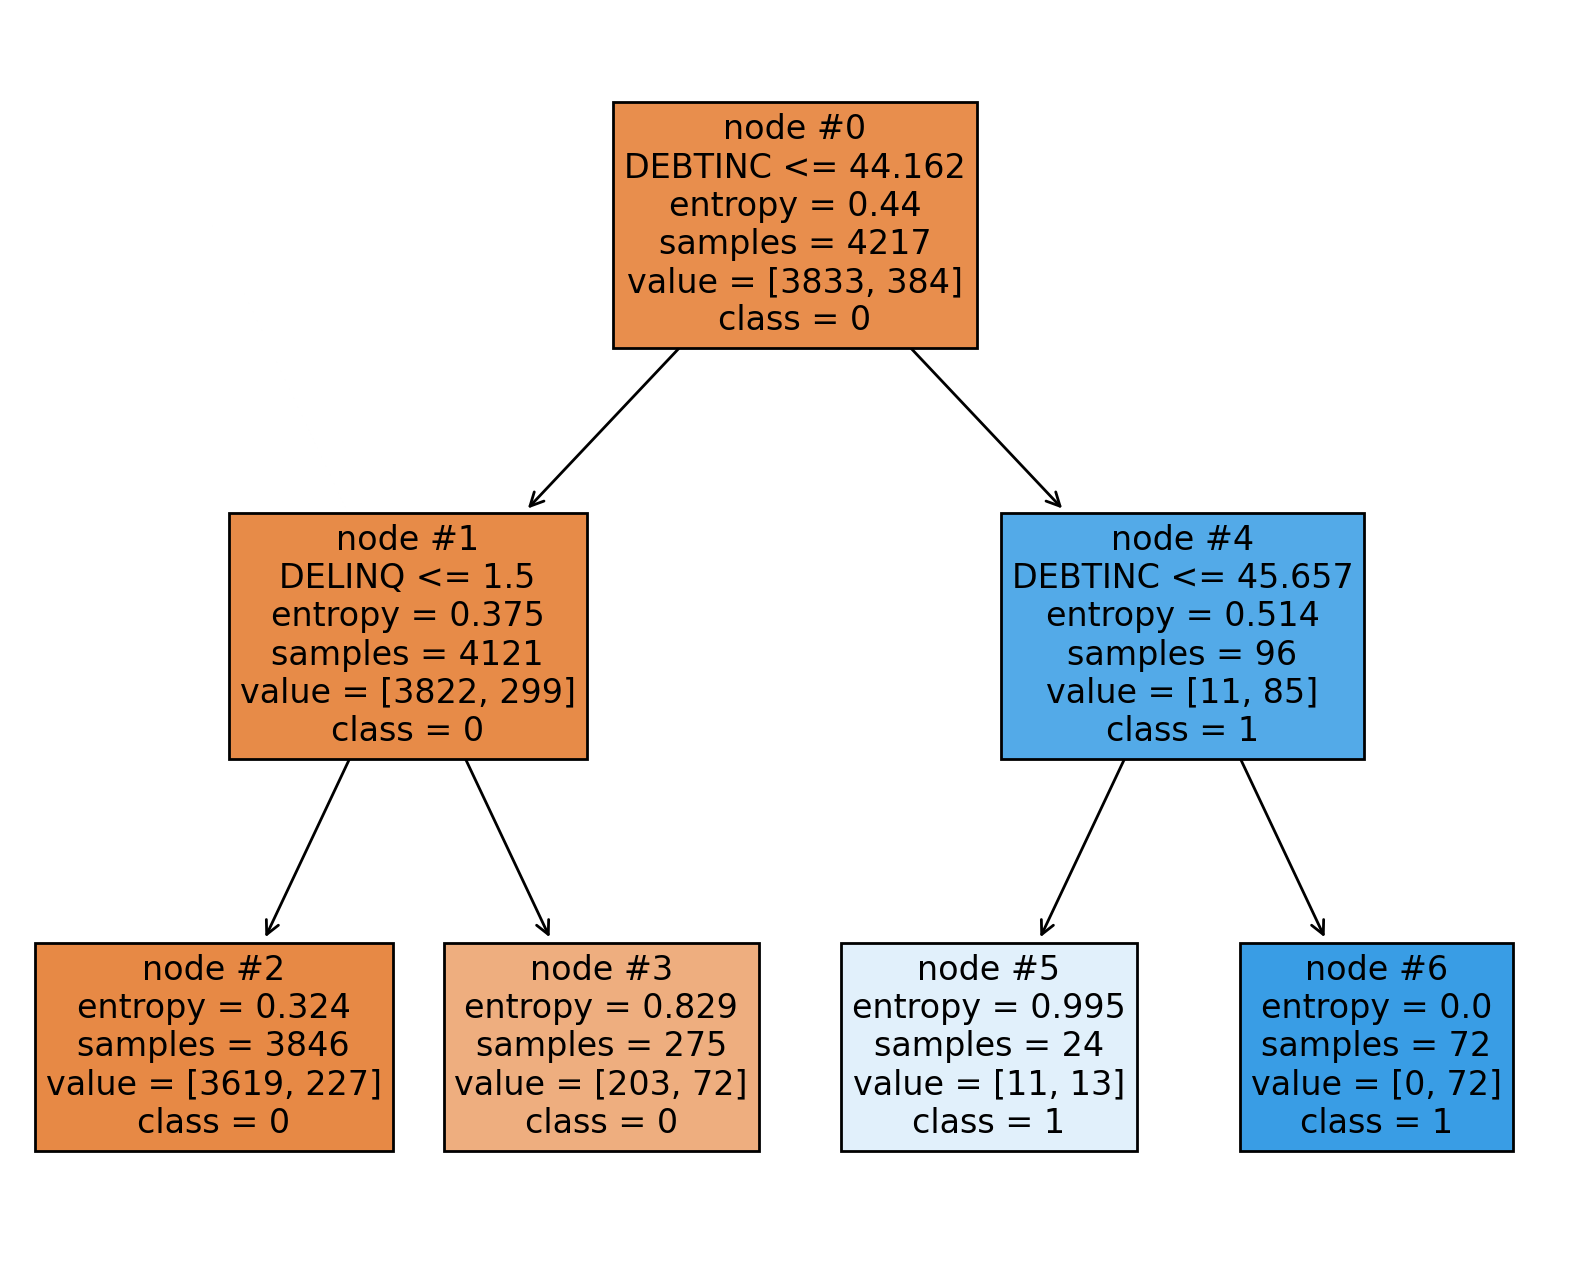

In [11]:

# Generate the frequency table and the bar chart for the BAD target variable
crossTable = pandas.crosstab(index = hmeq['BAD'], columns = ["Count"], margins = True, dropna = False)
crossTable['Percent'] = 100 * (crossTable['Count'] / nTotal)
crossTable = crossTable.drop(columns = ['All'])
print(crossTable)

plotTable = crossTable[crossTable.index != 'All']

plt.bar(plotTable.index, plotTable['Percent'])
plt.xticks(plotTable.index.to_list())
plt.xlabel('BAD')
plt.ylabel('Percent')
plt.grid(True, axis='y')
plt.show()

# Cross-tabulate BAD by DELINQ
resultTable = TargetPercentByNominal(hmeq['BAD'], 1, hmeq['DELINQ'], val4na = -1)

# Cross-tabulate BAD by DEROG
resultTable = TargetPercentByNominal(hmeq['BAD'], 1, hmeq['DEROG'], val4na = -1)

# Cross-tabulate BAD by JOB
resultTable = TargetPercentByNominal(hmeq['BAD'], 1, hmeq['JOB'], val4na = 'Unknown')

# Cross-tabulate BAD by NINQ
resultTable = TargetPercentByNominal(hmeq['BAD'], 1, hmeq['NINQ'], val4na = -1)

# Cross-tabulate BAD by REASON
resultTable = TargetPercentByNominal(hmeq['BAD'], 1, hmeq['REASON'], val4na = 'Unknown')

# Cross-tabulate BAD by DEBTINC
resultTable = TargetPercentByInterval(hmeq['BAD'], 1, hmeq['DEBTINC'], val4na = -10)

# Cross-tabulate BAD by CLAGE
resultTable = TargetPercentByInterval(hmeq['BAD'], 1, hmeq['CLAGE'], val4na = -10)

# Cross-tabulate BAD by CLNO
resultTable = TargetPercentByInterval(hmeq['BAD'], 1, hmeq['CLNO'], val4na = -10)

# Cross-tabulate BAD by LOAN
resultTable = TargetPercentByInterval(hmeq['BAD'], 1, hmeq['LOAN'], val4na = -10)

# Cross-tabulate BAD by MORTDUE
resultTable = TargetPercentByInterval(hmeq['BAD'], 1, hmeq['MORTDUE'], val4na = -10)

# Cross-tabulate BAD by VALUE
resultTable = TargetPercentByInterval(hmeq['BAD'], 1, hmeq['VALUE'], val4na = -10)

# Cross-tabulate BAD by YOJ
resultTable = TargetPercentByInterval(hmeq['BAD'], 1, hmeq['YOJ'], val4na = -10)


# 'DEBTINC'= Debt-to-income ratio
# 'DELINQ'= Number of delinquent credit lines
# 'BAD'= Status of Loans(Binary)

# Specify the target and the predictor variables
X_name = ['DEBTINC', 'DELINQ']
Y_name = 'BAD'

trainData = hmeq[['DEBTINC', 'DELINQ', 'BAD']].dropna()

X_inputs = trainData[X_name]
Y_target = trainData[Y_name]

# How many missing values are there?
print('Number of Missing Observations:')
print(X_inputs.isnull().sum())
print(Y_target.isnull().sum())

# Load the TREE library from SKLEARN
classTree = tree.F(criterion = 'entropy', max_depth = 2, random_state = 60616)

hmeq_DT = classTree.fit(X_inputs, Y_target)
DT_accuracy = classTree.score(X_inputs, Y_target)
print('Accuracy of Decision Tree classifier on training set: {:.6f}'.format(DT_accuracy))

fig, ax = plt.subplots(1, 1, figsize = (10,8), dpi = 200)
tree.plot_tree(hmeq_DT, feature_names = X_name, class_names = ['0','1'], label = 'all',
               filled = True, impurity = True, node_ids = True, proportion = False, rounded = False,
               precision = 3, ax = ax, fontsize = 12)
plt.show()


# Week 6 Toy Decision Tree.py

In [12]:


import matplotlib.pyplot as plt
import numpy
import pandas
import sys

import itertools

# Set some options for printing all the columns
numpy.set_printoptions(precision = 10, threshold = sys.maxsize)
numpy.set_printoptions(linewidth = numpy.inf)

pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)

pandas.options.display.float_format = '{:,.10f}'.format

def plog2p (proportion):
   '''A function that calculates the value p * log2(p).
   If p > 0.0, then result = p * log2(p) where log2() is the base 2 logarithm function
   If p == 0.0, then result = 0.0
   Otherwise, then result is NaN

   Argument:
   1. proportion: a value between 0.0 and 1.0

   Output:
   1. result: the p * log2(p) value
   '''

   if (0.0 < proportion and proportion < 1.0):
      result = proportion * numpy.log2(proportion)
   elif (proportion == 0.0 or proportion == 1.0):
      result = 0.0
   else:
      result = numpy.nan

   return (result)

def NodeEntropy (nodeCount):
   '''A function that calculate the entropy of a node given a row of counts.
   
   Argument:
   1. nodeCount: a Pandas Series of the counts of target values of the node
   
   Output:
   1. nodeTotal: the sum of counts of the node
   2. nodeEntropy: the entropy of the node.
   '''

   nodeTotal = numpy.sum(nodeCount)
   nodeProportion = nodeCount / nodeTotal
   nodeEntropy = - numpy.sum(nodeProportion.apply(plog2p))

   return (nodeTotal, nodeEntropy)

def EntropyNominalSplit (target, catPredictor, splitList, debug = 'N'):
   '''A function that calculates the split entropy for splitting a categorical predictor into
   two groups by a split value

   Argument:
   1. target: a Pandas Series of target values
   2. catPredictor: a Pandas Series of predictor values
   3. splitList: a list of values for splitting the predictor values into two groups
   4. debug: a Y/N flag to show debugging information

   Output:
   1. nNode: number of nodes
   2. splitEntropy: the split entropy value
   '''

   branch_indicator = numpy.where(catPredictor.isin(splitList), 'LEFT', 'RIGHT')
   xtab = pandas.crosstab(index = branch_indicator, columns = target, margins = False, dropna = True)
   if (debug == 'Y'):
      print('Target: ', target)
      print('Predictor: ', catPredictor)
      print('Split Value: ', splitList)
      print('Split Crosstabulation:')
      print(xtab)

   nNode = 0
   splitEntropy = 0.0
   tableTotal = 0.0
   for idx, row in xtab.iterrows():
      nNode = nNode + 1
      rowTotal, rowEntropy = NodeEntropy(row)
      tableTotal = tableTotal + rowTotal
      splitEntropy = splitEntropy + rowTotal * rowEntropy

   splitEntropy = splitEntropy / tableTotal
  
   return(nNode, splitEntropy)

trainData = pandas.read_excel('PepperSaltSugar.xlsx')

# Univariate frequency bar charts
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, dpi = 200, sharey = True, figsize = (14,6))
fig.tight_layout()
ufreq_A = trainData['A'].astype('category').value_counts()
ax1.bar(ufreq_A.index, ufreq_A, color = 'seagreen')
ax1.set_xlabel('A')
ax1.set_ylabel('Number of Observations')
ax1.yaxis.grid(True)

ufreq_B = trainData['B'].astype('category').value_counts()
ax2.bar(ufreq_B.index, ufreq_B, color = 'dodgerblue')
ax2.set_xlabel('B')
ax2.set_ylabel('')
ax2.yaxis.grid(True)

plt.show()

# Extract the columns for easier use
A = trainData['A']
B = trainData['B']

crossTable = pandas.crosstab(index = A, columns = B, margins = True, dropna = True)   
print(crossTable)

# Root node entropy
node_total, root_entropy = NodeEntropy (ufreq_B)
print('Total Count: ', node_total)
print('Root Node Entropy: ', root_entropy)

# Calculate the entropy of all the possible splits
category_A = set(ufreq_A.index)
n_category = len(category_A)

print('Number of Categories =', n_category)
print('Categories: \n', category_A)
print('Number of Possible Splits = ', (2**(n_category-1) - 1))

def takeEntropy(s):
    return s[2]

split_summary = []
for size in range(1, n_category//2 + 1):
    comb_size = itertools.combinations(category_A, size)
    for item in list(comb_size):
        left_branch = list(item)
        right_branch = list(category_A.difference(left_branch))
        nNode, splitEntropy = EntropyNominalSplit (B, A, left_branch, debug = 'N')
        if (nNode > 1):
            split_summary.append([left_branch, right_branch, splitEntropy])

# Determine the split that yields the lowest splitEntropy
split_summary.sort(key = takeEntropy, reverse = False)

print('=== Optimal Split ===')
print(' Left Branch Set: ', split_summary[0][0])
print('Right Branch Set: ', split_summary[0][1])
print('   Split Entropy: ', split_summary[0][2])

df = pandas.DataFrame(split_summary)



FileNotFoundError: [Errno 2] No such file or directory: 'PepperSaltSugar.xlsx'

# Week 6 MultiClass Decision Tree.py

In [5]:

import matplotlib.pyplot as plt
import numpy
import pandas
import sys

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from sklearn import tree

# Set some options for printing all the columns
numpy.set_printoptions(precision = 10, threshold = sys.maxsize)
numpy.set_printoptions(linewidth = numpy.inf)

pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)

pandas.options.display.float_format = '{:,.10f}'.format

def plog2p (proportion):
   '''A function that calculates the value p * log2(p).
   If p > 0.0, then result = p * log2(p) where log2() is the base 2 logarithm function
   If p == 0.0, then result = 0.0
   Otherwise, then result is NaN

   Argument:
   1. proportion: a value between 0.0 and 1.0

   Output:
   1. result: the p * log2(p) value
   '''

   if (0.0 < proportion and proportion < 1.0):
      result = proportion * numpy.log2(proportion)
   elif (proportion == 0.0 or proportion == 1.0):
      result = 0.0
   else:
      result = numpy.nan

   return (result)

def NodeEntropy (nodeCount):
   '''A function that calculate the entropy of a node given a row of counts.
   
   Argument:
   1. nodeCount: a Pandas Series of the counts of target values of the node
   
   Output:
   1. nodeTotal: the sum of counts of the node
   2. nodeEntropy: the entropy of the node.
   '''

   nodeTotal = numpy.sum(nodeCount)
   nodeProportion = nodeCount / nodeTotal
   nodeEntropy = - numpy.sum(nodeProportion.apply(plog2p))

   return (nodeTotal, nodeEntropy)

def EntropyIntervalSplit (target, intPredictor, splitValue, debug = 'N'):
   '''A function that calculates the split entropy for splitting an interval predictor into
   two groups by a split value

   Argument:
   1. target: a Pandas Series of target values
   2. intPredictor: a Pandas Series of predictor values
   3. splitValue: a number for splitting the predictor values into two groups
   4. debug: a Y/N flag to show debugging information

   Output:
   1. nNode: number of nodes
   2. splitEntropy: the split entropy value
   '''

   branch_indicator = numpy.where(intPredictor <= splitValue, 'LEFT', 'RIGHT')
   xtab = pandas.crosstab(index = branch_indicator, columns = target, margins = False, dropna = True)
   if (debug == 'Y'):
      print('Target: ', target)
      print('Predictor: ', intPredictor)
      print('Split Value: ', splitValue)
      print('Split Crosstabulation:')
      print(xtab)

   nNode = 0
   splitEntropy = 0.0
   tableTotal = 0.0
   for idx, row in xtab.iterrows():
      nNode = nNode + 1
      rowTotal, rowEntropy = NodeEntropy(row)
      tableTotal = tableTotal + rowTotal
      splitEntropy = splitEntropy + rowTotal * rowEntropy

   splitEntropy = splitEntropy / tableTotal
  
   return(nNode, splitEntropy)

cars = pandas.read_csv('cars.csv', delimiter=',')

trainData = cars[['Cylinders', 'Origin']].dropna()


In [6]:
cars
# Cylinders = ordinal(3,4,5,,)
# Origi n= Categorical(Asia, Europe, and USA)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,AWD,36945,33337,3.5000000000,6.0000000000,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,FWD,23820,21761,2.0000000000,4.0000000000,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,FWD,26990,24647,2.4000000000,4.0000000000,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,FWD,33195,30299,3.2000000000,6.0000000000,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,FWD,43755,39014,3.5000000000,6.0000000000,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,FWD,40565,38203,2.4000000000,5.0000000000,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,FWD,42565,40083,2.3000000000,5.0000000000,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,FWD,45210,42573,2.9000000000,6.0000000000,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,FWD,26135,24641,1.9000000000,4.0000000000,170,22,29,2822,101,180


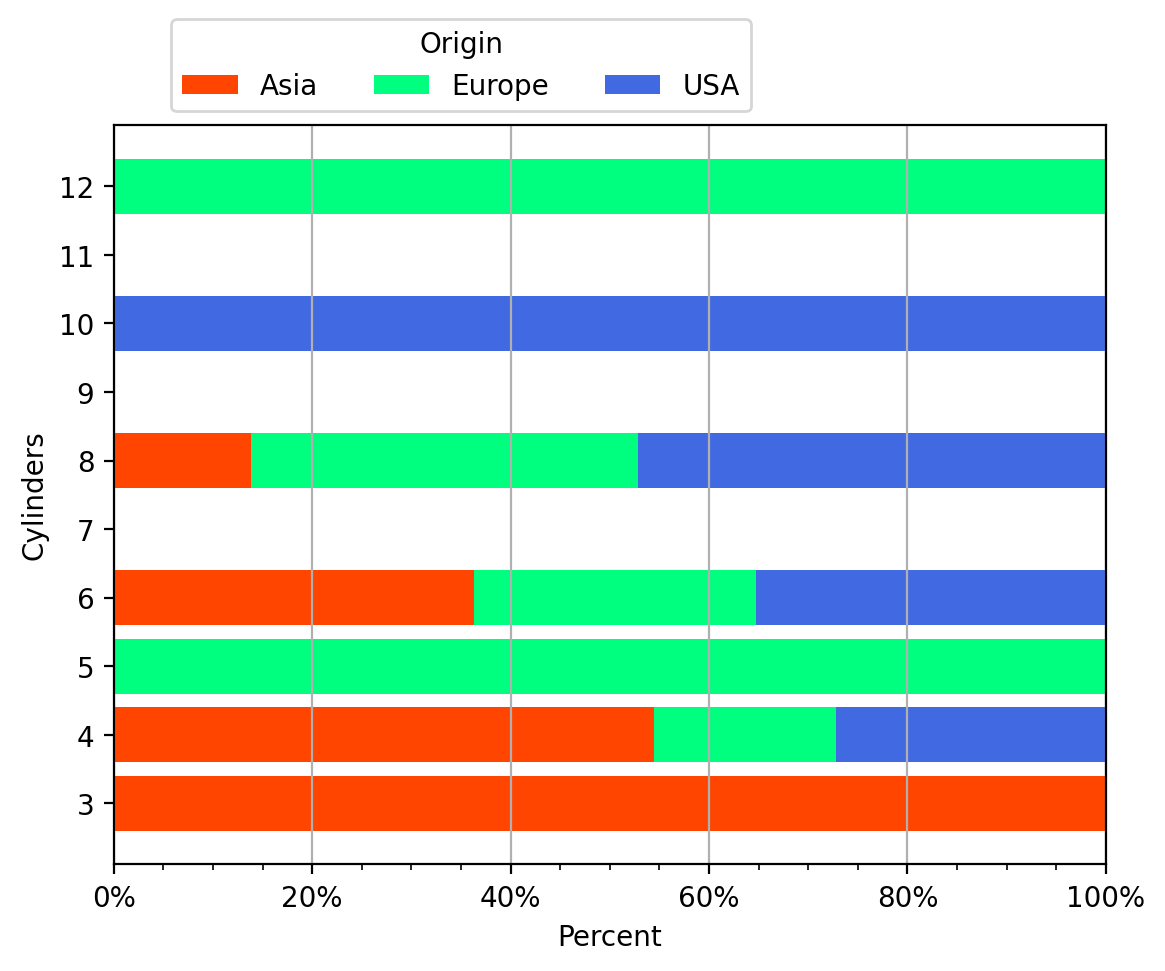

Origin     Asia  Europe  USA  All
Cylinders                        
3.0           1       0    0    1
4.0          74      25   37  136
5.0           0       7    0    7
6.0          69      54   67  190
8.0          12      34   41   87
10.0          0       0    2    2
12.0          0       3    0    3
All         156     123  147  426


Left Node: Cylinders <=  3.0
Right Node: Cylinders >  3.0
Number of Nodes =  2
Split Entropy =  1.574484005916604


Left Node: Cylinders <=  4.0
Right Node: Cylinders >  4.0
Number of Nodes =  2
Split Entropy =  1.528773129351644


Left Node: Cylinders <=  5.0
Right Node: Cylinders >  5.0
Number of Nodes =  2
Split Entropy =  1.5404337424630097


Left Node: Cylinders <=  6.0
Right Node: Cylinders >  6.0
Number of Nodes =  2
Split Entropy =  1.5240669597552028


Left Node: Cylinders <=  8.0
Right Node: Cylinders >  8.0
Number of Nodes =  2
Split Entropy =  1.5693898859519428


Left Node: Cylinders <=  10.0
Right Node: Cylinders >  10.0
Number of Nodes

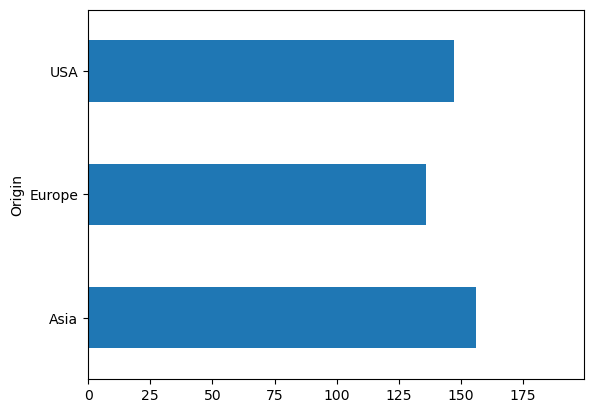

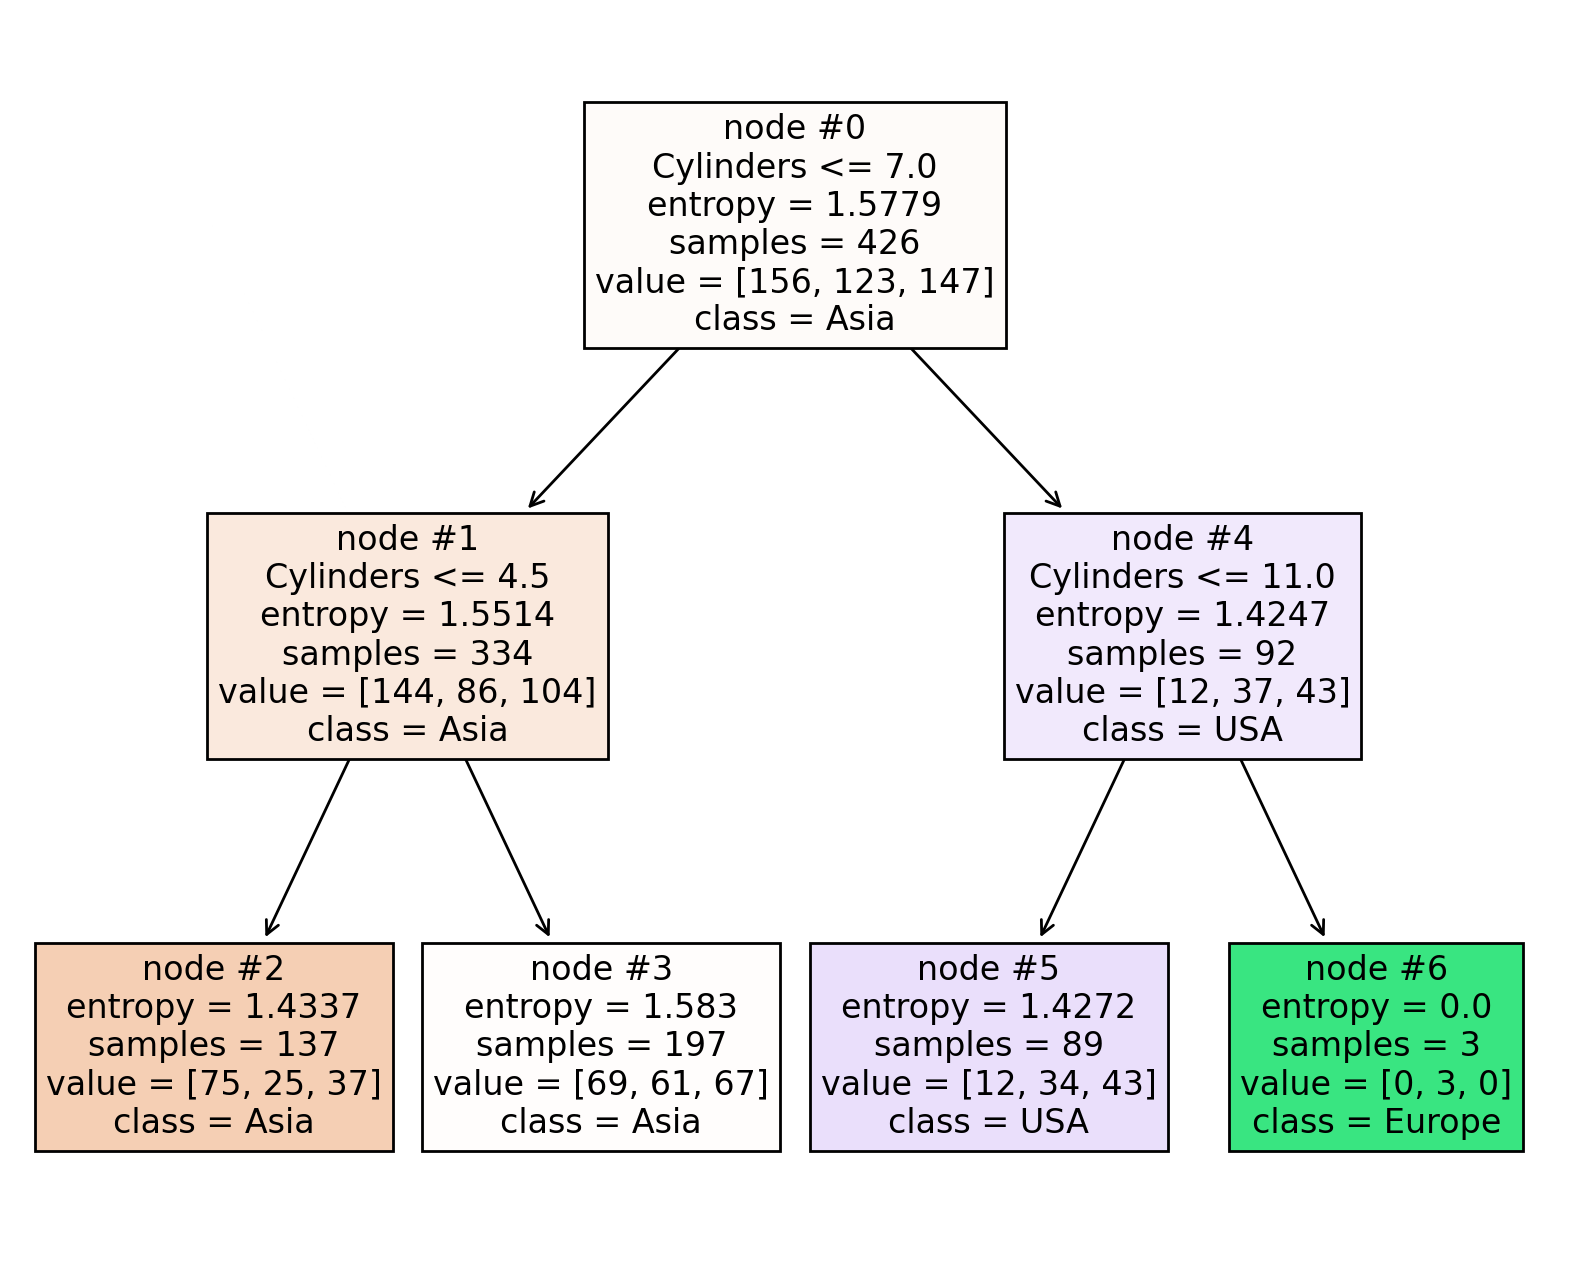

In [13]:

# Extract the columns for easier use
Cylinders = trainData['Cylinders']
Origin = trainData['Origin']

# Generate a horizontal stacked percentage bar chart
yCat = ['Asia', 'Europe', 'USA']
cmap = ['orangered','springgreen', 'royalblue']

cntTable = pandas.crosstab(index = Cylinders, columns = Origin, margins = False, dropna = True)
pctTable = 100.0 * cntTable.div(cntTable.sum(1), axis = 'index')

barThick = 0.8
yCat = cntTable.columns
accPct = numpy.zeros(pctTable.shape[0])
fig, ax = plt.subplots(dpi = 200)
for j in range(len(yCat)):
    catLabel = yCat[j]
    plt.barh(pctTable.index, pctTable[catLabel], color = cmap[j], left = accPct, label = catLabel, height = barThick)
    accPct = accPct + pctTable[catLabel]
ax.xaxis.set_major_locator(MultipleLocator(base = 20))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f%%'))
ax.xaxis.set_minor_locator(MultipleLocator(base = 5))
ax.yaxis.set_major_locator(MultipleLocator(base = 1))
ax.set_xlabel('Percent')
ax.set_ylabel('Cylinders')
plt.grid(axis = 'x')
plt.legend(loc = 'lower center', bbox_to_anchor = (0.35, 1), ncol = 3, title = 'Origin')
plt.show()

# Horizontal frequency bar chart of Cylinders
trainData.groupby('Cylinders').size().plot(kind='barh')

# Horizontal frequency bar chart of Cylinders
trainData.groupby('Origin').size().plot(kind='barh')

crossTable = pandas.crosstab(index = Cylinders, columns = Origin, margins = True, dropna = True)   
print(crossTable)

uniqueCylinders = numpy.unique(Cylinders)

# Calculate the entropy of all the possible splits
for splitValue in uniqueCylinders:
   print('\n')
   print('Left Node: Cylinders <= ', splitValue)
   print('Right Node: Cylinders > ', splitValue)
   nNode, EV = EntropyIntervalSplit (Origin, Cylinders, splitValue)
   print('Number of Nodes = ', nNode)
   print('Split Entropy = ', EV)

# Select observations in root node data into Left branch
LeftBranch = trainData[trainData['Cylinders'].isin([3,4,5,6])]

Cylinders = LeftBranch['Cylinders']
Origin = LeftBranch['Origin']

crossTable = pandas.crosstab(index = Cylinders, columns = Origin, margins = True, dropna = True)   
print(crossTable)

uniqueCylinders = numpy.unique(Cylinders)

# Calculate the entropy of all the possible splits
for splitValue in uniqueCylinders:
   print('\n')
   print('Left Node: Cylinders <= ', splitValue)
   print('Right Node: Cylinders > ', splitValue)
   nNode, EV = EntropyIntervalSplit (Origin, Cylinders, splitValue)
   print('Number of Nodes = ', nNode)
   print('Split Entropy = ', EV)

# Select observations in root node data into Right branch
RightBranch = trainData[~trainData['Cylinders'].isin([3,4,5,6])]

Cylinders = RightBranch['Cylinders']
Origin = RightBranch['Origin']

crossTable = pandas.crosstab(index = Cylinders, columns = Origin, margins = True, dropna = True)   
print(crossTable)

uniqueCylinders = numpy.unique(Cylinders)

# Calculate the entropy of all the possible splits
for splitValue in uniqueCylinders:
   print('\n')
   print('Left Node: Cylinders <= ', splitValue)
   print('Right Node: Cylinders > ', splitValue)
   nNode, EV = EntropyIntervalSplit (Origin, Cylinders, splitValue)
   print('Number of Nodes = ', nNode)
   print('Split Entropy = ', EV)


Accuracy of Decision Tree classifier on training set: 0.446009


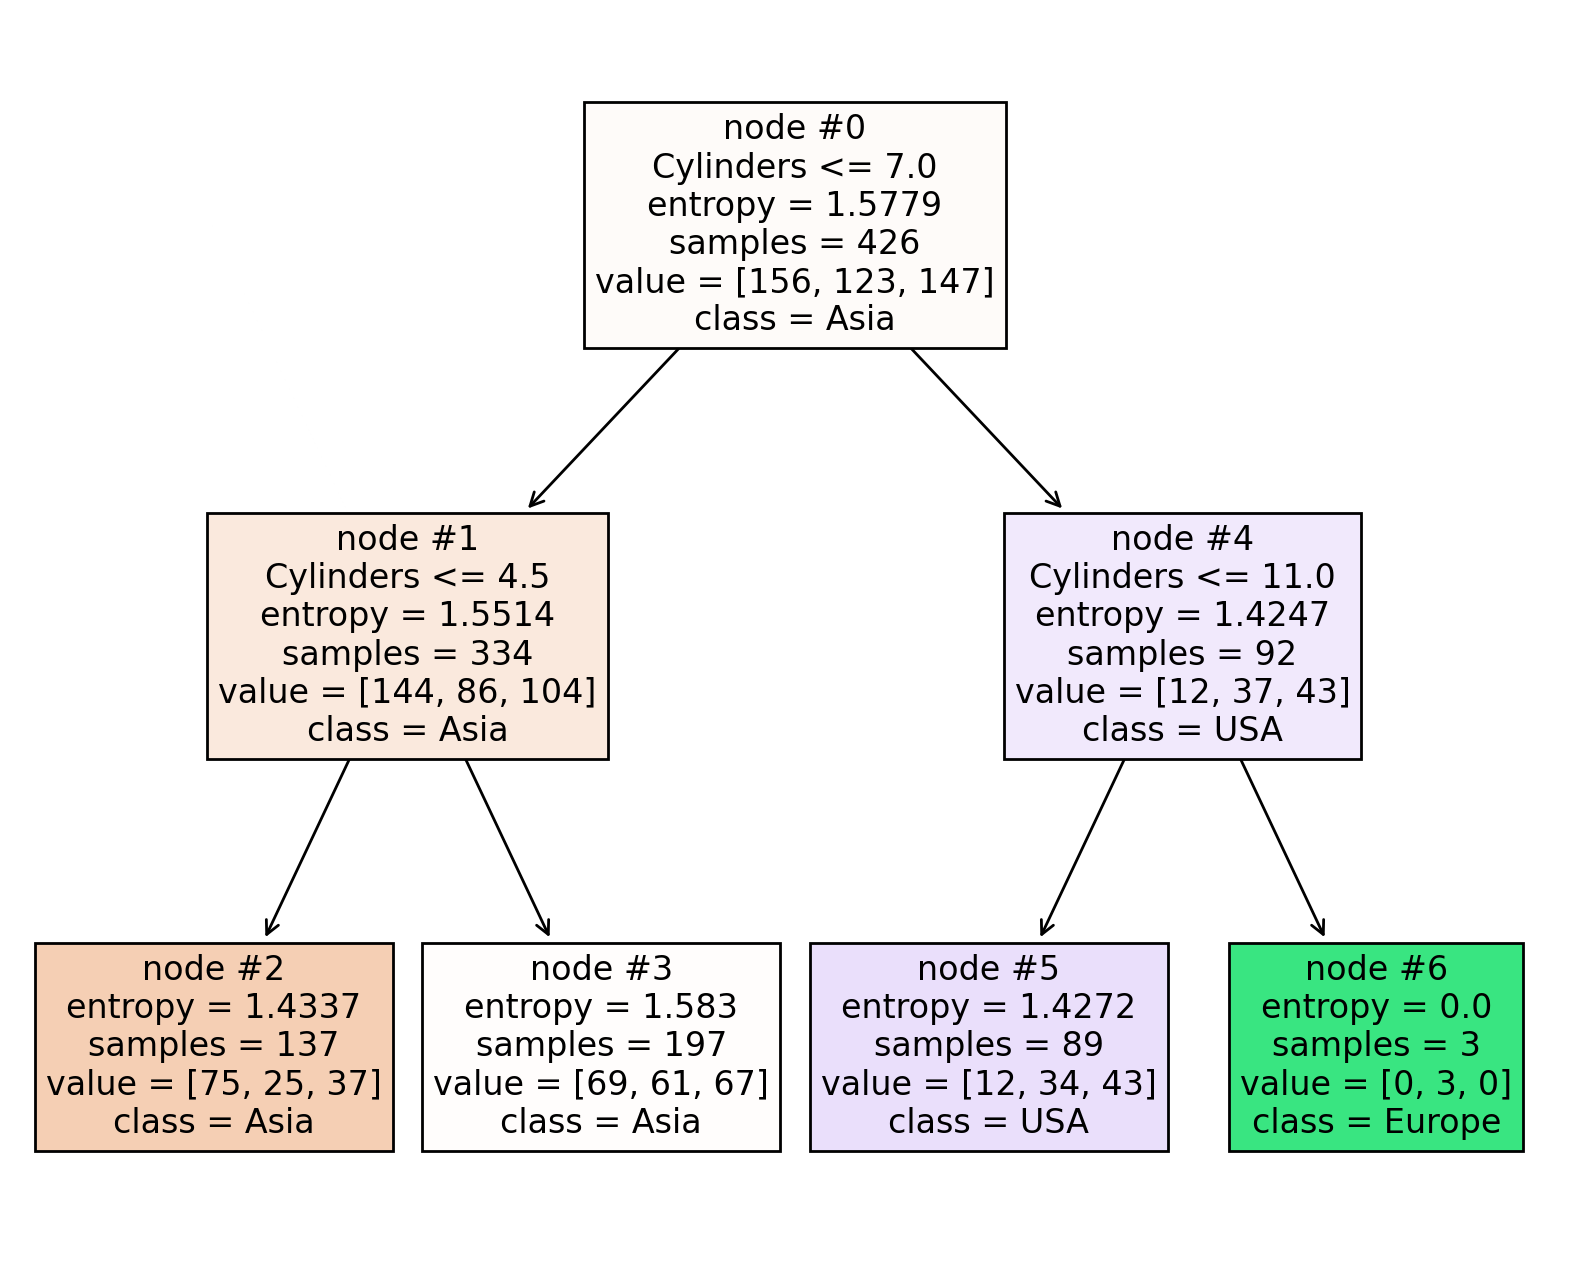

In [18]:

# Reproduce the results using the Scikit-Learn Tree module
classTree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state = 60616)
cars_DT = classTree.fit(trainData[['Cylinders']], trainData['Origin'])

DT_accuracy = classTree.score(trainData[['Cylinders']], trainData['Origin'])
print('Accuracy of Decision Tree classifier on training set: {:.6f}'.format(DT_accuracy))

fig, ax = plt.subplots(1, 1, figsize = (10,8), dpi = 200)
tree.plot_tree(cars_DT, feature_names = ['Cylinders'], class_names = ['Asia', 'Europe', 'USA'],
               label = 'all', filled = True, impurity = True, node_ids = True, proportion = False,
               rounded = False, precision = 4, ax = ax, fontsize = 12)
plt.show()


# Week 6 BikeShare ClusterTree.py

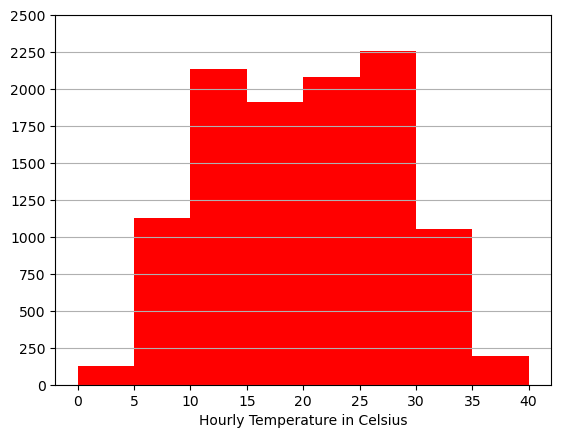

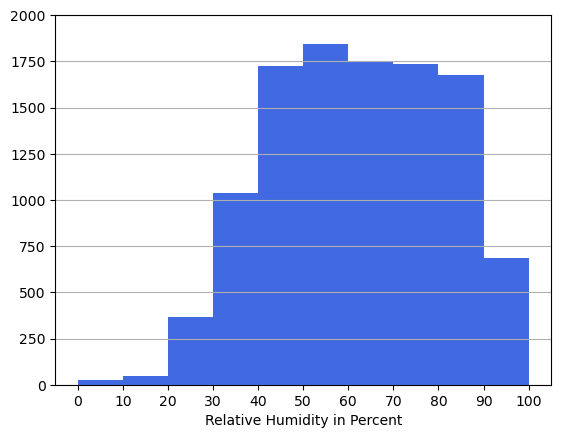

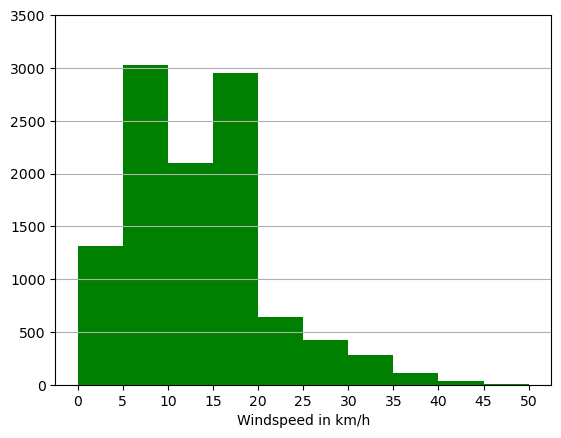

/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Finish Number of Clusters =  1


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Finish Number of Clusters =  2


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Finish Number of Clusters =  3


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Finish Number of Clusters =  4


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Finish Number of Clusters =  5


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Finish Number of Clusters =  6


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Finish Number of Clusters =  7


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Finish Number of Clusters =  8


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Finish Number of Clusters =  9


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Finish Number of Clusters =  10


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Finish Number of Clusters =  11


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Finish Number of Clusters =  12


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Finish Number of Clusters =  13


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Finish Number of Clusters =  14


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Finish Number of Clusters =  15
Cluster Size  Elbow Value   Silhouette Value: /n
1.0 497.6941249733733 0.0
2.0 457.2544153440925 0.4361531019878243
3.0 527.7253968581186 0.32192865379925556
4.0 614.9363226518899 0.2880779710085013
5.0 671.3171341016842 0.2771558757002433
6.0 724.4718791943817 0.2687963319111788
7.0 773.9426824091614 0.2637937531409776
8.0 829.0964624446358 0.26159383386210405
9.0 868.4492117821279 0.25591074933121444
10.0 916.4350377045043 0.25843845346255473
11.0 941.026772211694 0.2524471605814744
12.0 961.4958497763147 0.2513673405325797
13.0 993.5988323230565 0.2498473537706989
14.0 1016.9037170132405 0.25100711628261074
15.0 1052.8877362430987 0.24906713455916524


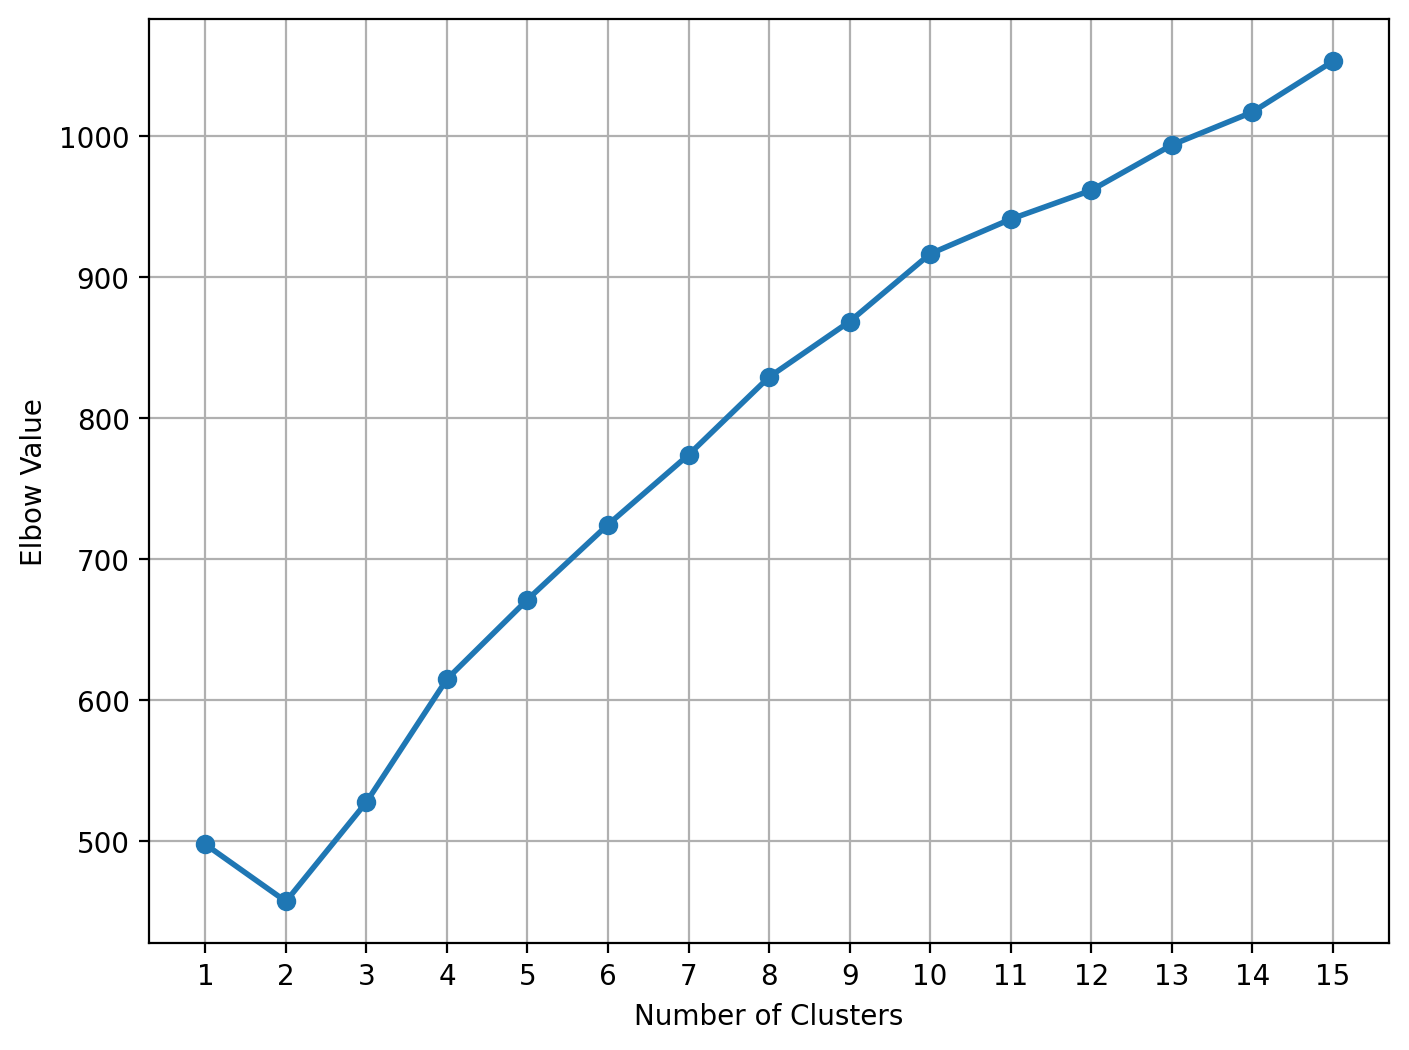

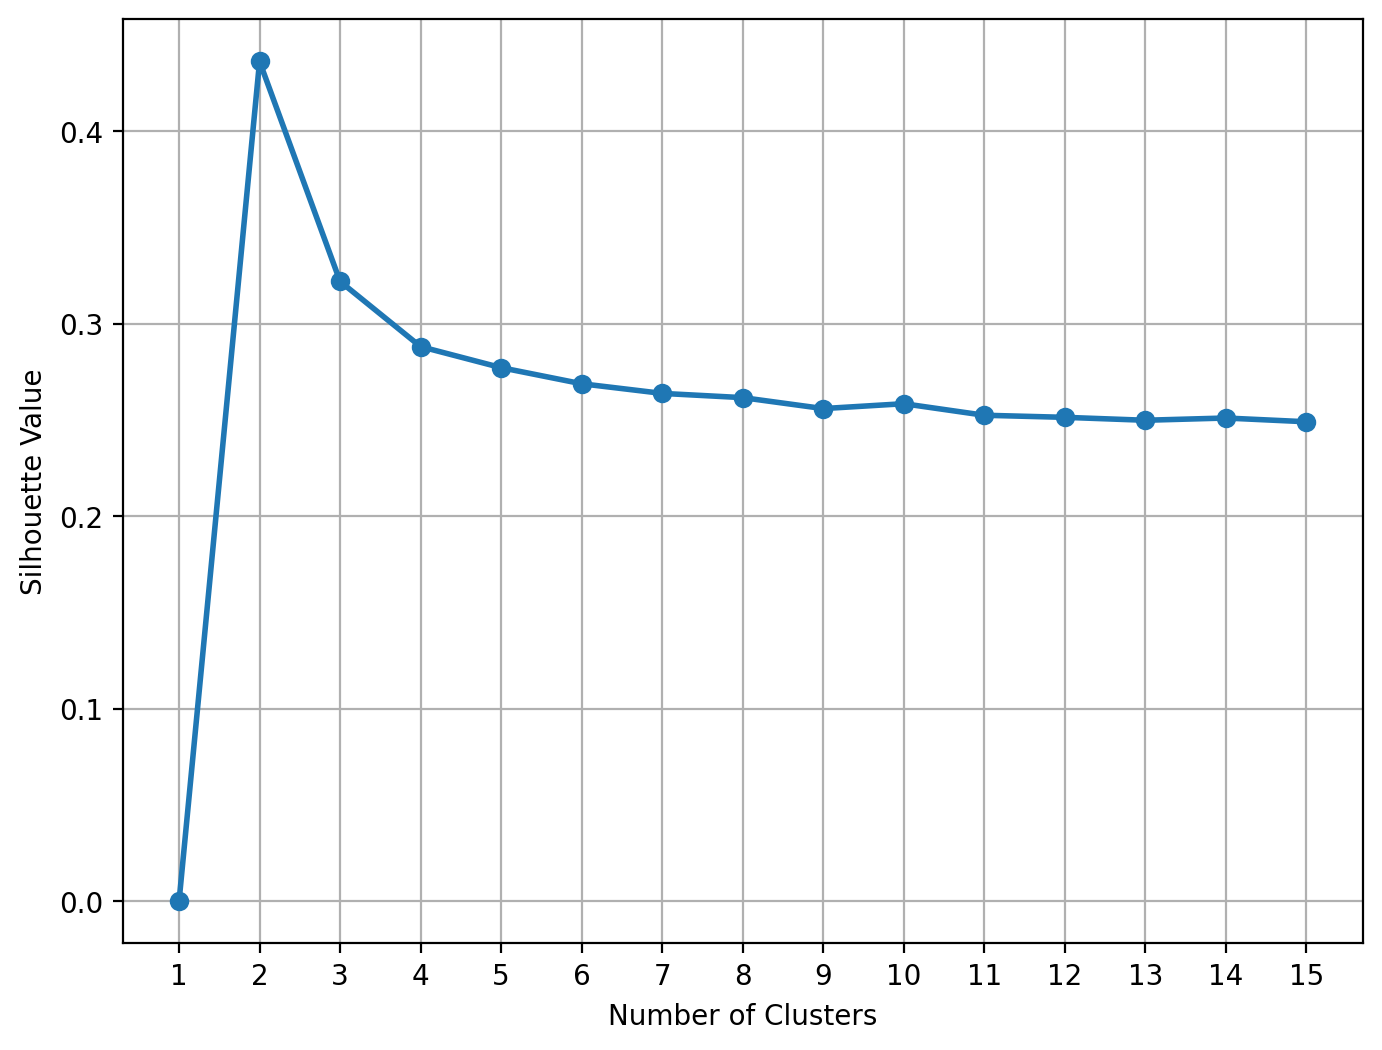

/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[5466. 5420.]
Cluster  0
Centroid =  [20.080102414  78.0208485735 10.269736229 ]
Cluster  1
Centroid =  [20.3830084902 45.6031746032 15.3523995386]
Accuracy of Decision Tree classifier on training set: 0.996326


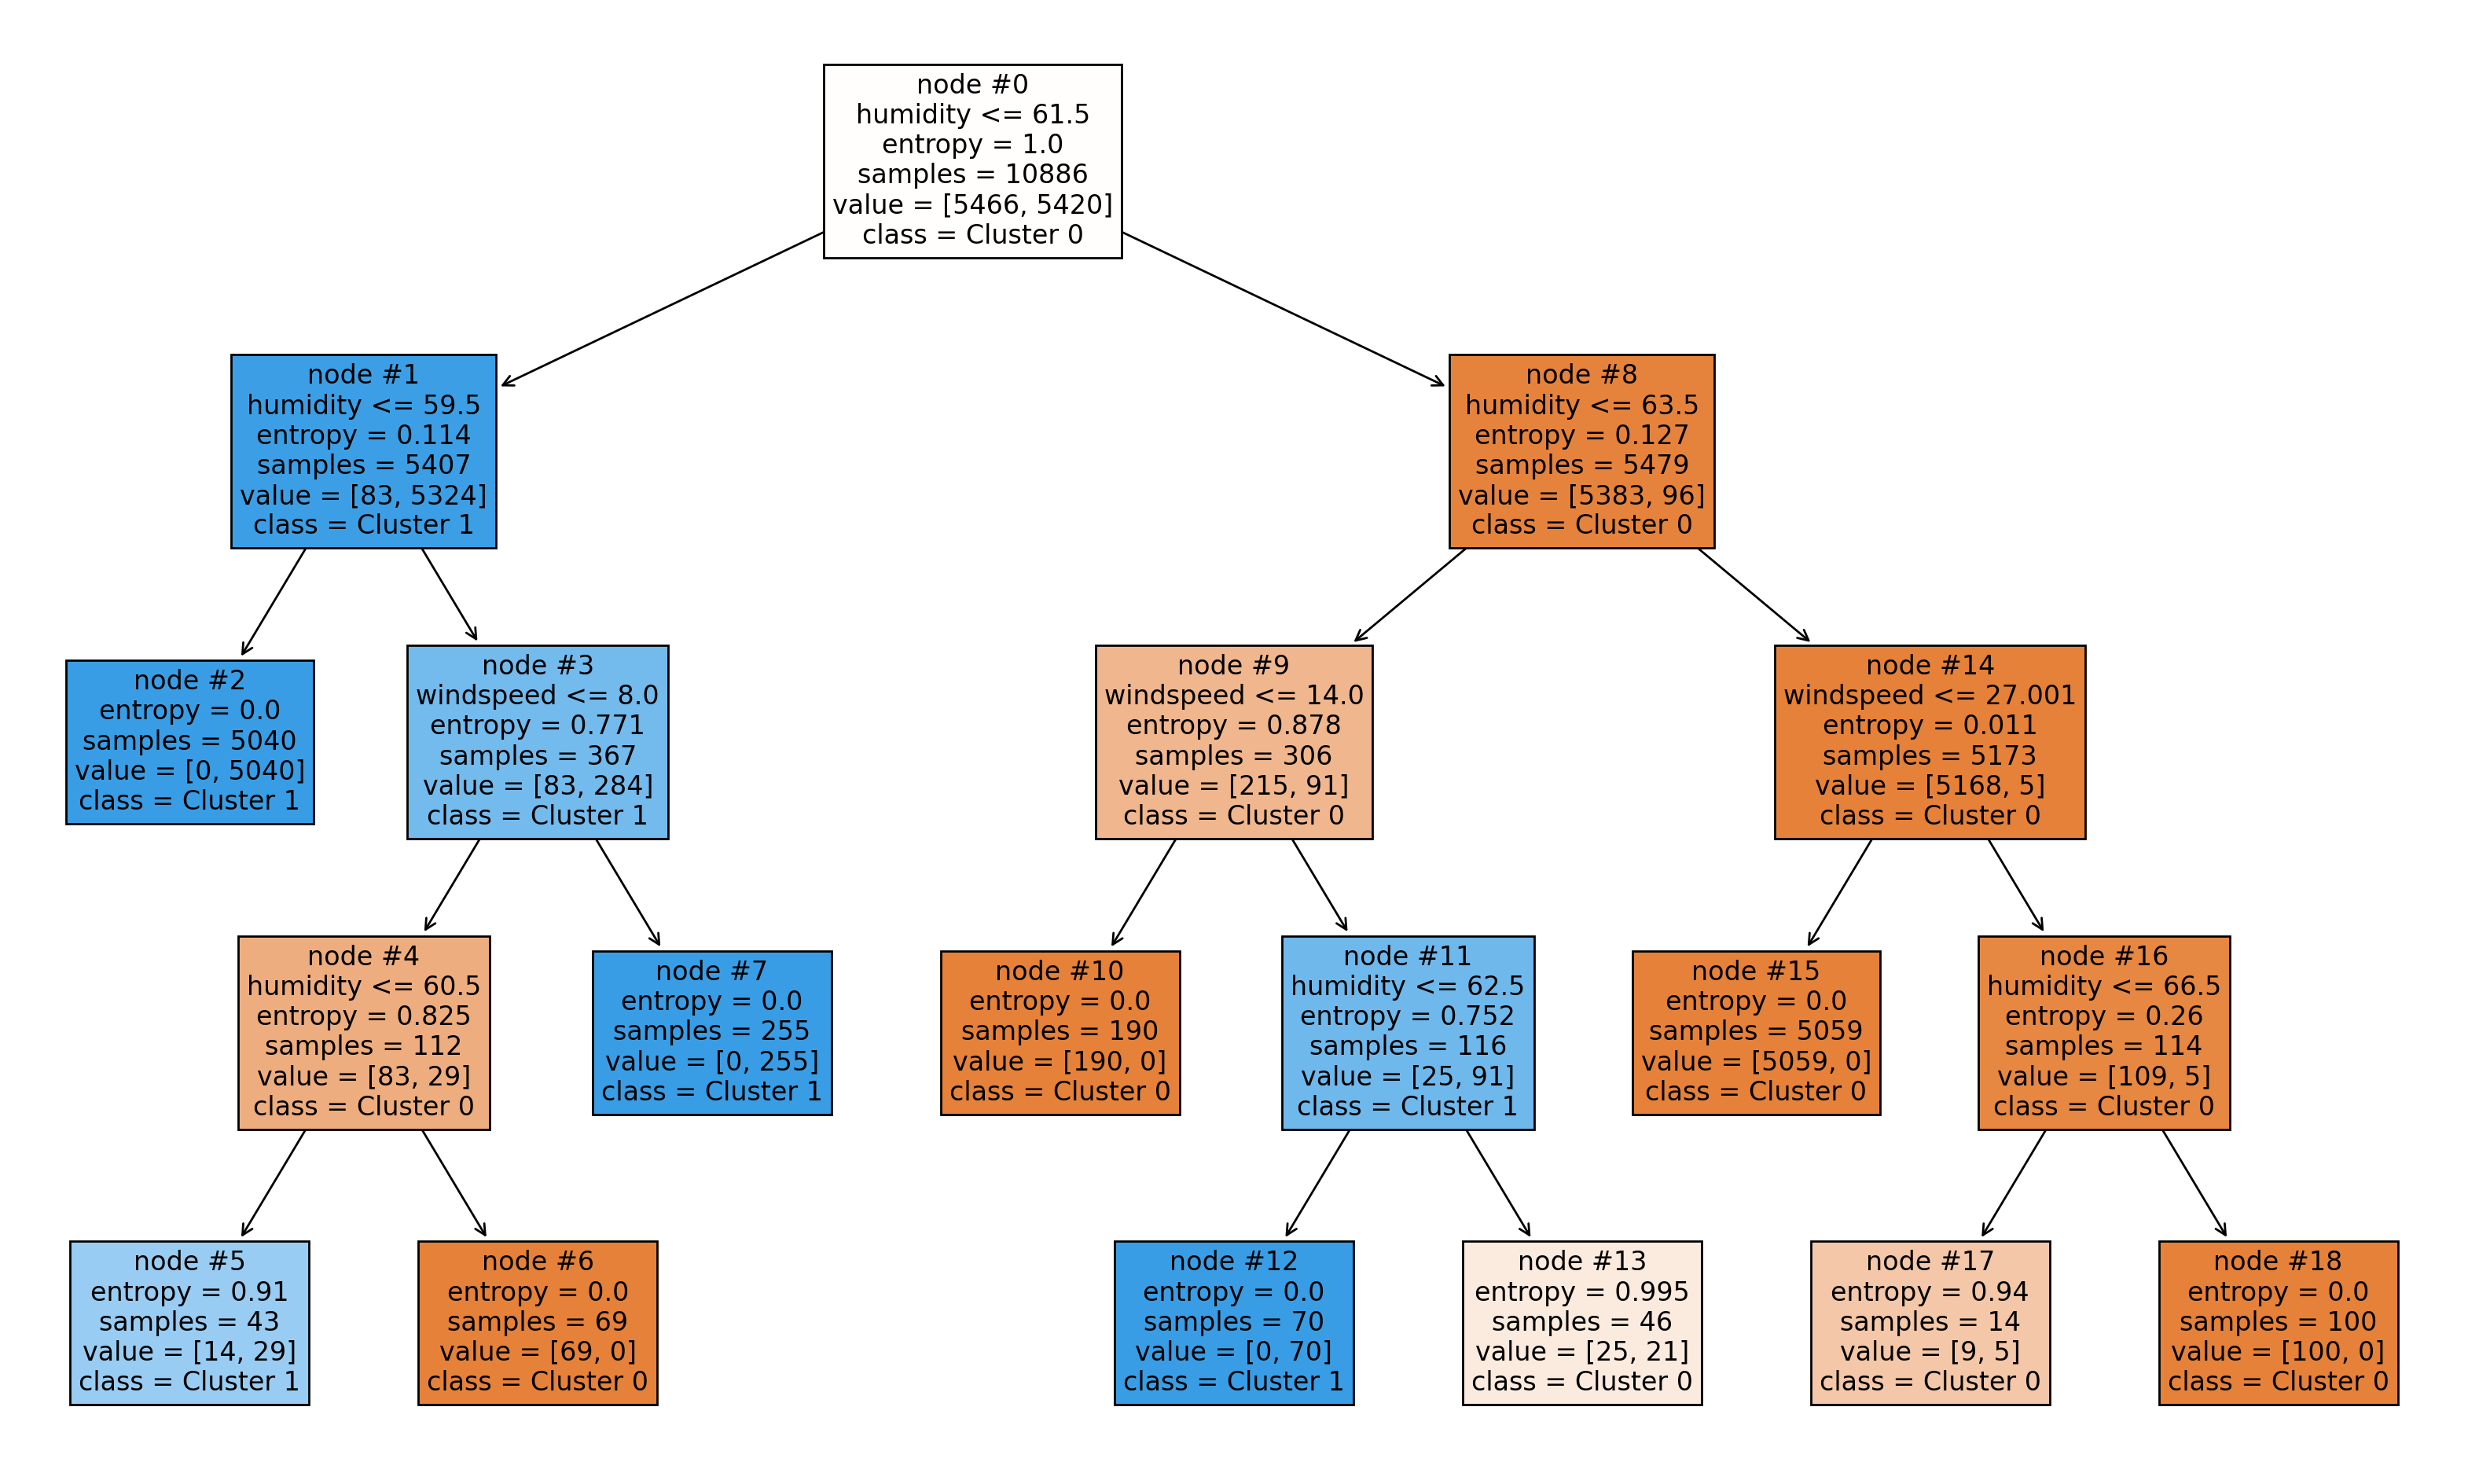

In [14]:


import matplotlib.pyplot as plt
import numpy
import pandas

from sklearn import cluster, metrics, tree

# Set some options for printing all the columns
numpy.set_printoptions(precision = 10, threshold = sys.maxsize)
numpy.set_printoptions(linewidth = numpy.inf)

pandas.set_option('display.max_columns', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)

pandas.options.display.float_format = '{:,.7f}'.format

bikeshare = pandas.read_csv('BikeSharingDemand_Train.csv', delimiter=',')

# Use only these four interval variables
trainData = bikeshare[['temp', 'humidity', 'windspeed']].dropna()
nObs = trainData.shape[0]

plt.hist(trainData['temp'], bins = [0,5,10,15,20,25,30,35,40], align = 'mid', color = 'red')
plt.xlabel('Hourly Temperature in Celsius')
plt.xticks(numpy.arange(0,45,5))
plt.yticks(numpy.arange(0,2750,250))
plt.grid(axis = 'y')
plt.show()

plt.hist(trainData['humidity'], bins = [0,10,20,30,40,50,60,70,80,90,100], align = 'mid', color = 'royalblue')
plt.xlabel('Relative Humidity in Percent')
plt.xticks(numpy.arange(0,110,10))
plt.yticks(numpy.arange(0,2250,250))
plt.grid(axis = 'y')
plt.show()

plt.hist(trainData['windspeed'], bins = [0,5,10,15,20,25,30,35,40,45,50], align = 'mid', color = 'green')
plt.xlabel('Windspeed in km/h')
plt.xticks(numpy.arange(0,55,5))
plt.yticks(numpy.arange(0,4000,500))
plt.grid(axis = 'y')
plt.show()

# Determine the number of clusters using the Silhouette metrics
nClusters = numpy.zeros(15)
Elbow = numpy.zeros(15)
Silhouette = numpy.zeros(15)

for c in range(15):
   KClusters = c + 1
   nClusters[c] = KClusters

   kmeans = cluster.KMeans(n_clusters=KClusters, random_state=60616).fit(trainData)

   if (KClusters > 1):
       Silhouette[c] = metrics.silhouette_score(trainData, kmeans.labels_)

   WCSS = numpy.zeros(KClusters)
   nC = numpy.zeros(KClusters)

   for i in range(nObs):
      k = kmeans.labels_[i]
      nC[k] += 1
      diff = trainData.iloc[i,] - kmeans.cluster_centers_[k]
      WCSS[k] += diff.dot(diff)

   Elbow[c] = 0
   for k in range(KClusters):
      Elbow[c] += WCSS[k] / nC[k]

   print('Finish Number of Clusters = ', KClusters)

print("Cluster Size  Elbow Value   Silhouette Value: /n")
for c in range(15):
   print(nClusters[c], Elbow[c], Silhouette[c])

plt.figure(figsize = (8,6), dpi = 200)
plt.plot(nClusters, Elbow, linewidth = 2, marker = 'o')
plt.xticks(range(1,16,1))
plt.grid(True)
plt.xlabel("Number of Clusters")
plt.ylabel("Elbow Value")
plt.show()

# Plot the Silhouette metrics versus the number of clusters
plt.figure(figsize = (8,6), dpi = 200)
plt.plot(nClusters, Silhouette, linewidth = 2, marker = 'o')
plt.xticks(range(1,16,1))
plt.grid(True)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Value")
plt.show()

KClusters = 2
kmeans = cluster.KMeans(n_clusters=KClusters, random_state=60616).fit(trainData)

nC = numpy.zeros(KClusters)
for i in range(nObs):
   k = kmeans.labels_[i]
   nC[k] += 1
print(nC)

for k in range(KClusters):
   print("Cluster ", k)
   print("Centroid = ", kmeans.cluster_centers_[k])

# Train a classification tree with the cluster identifier as the label
classTree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=60616)

bikeshare_DT = classTree.fit(trainData, kmeans.labels_)
DT_accuracy = classTree.score(trainData, kmeans.labels_)
print('Accuracy of Decision Tree classifier on training set: {:.6f}'.format(DT_accuracy))

fig, ax = plt.subplots(1, 1, figsize = (20,12), dpi = 200)
tree.plot_tree(bikeshare_DT, feature_names = ['temp', 'humidity', 'windspeed'],
               class_names = ['Cluster 0', 'Cluster 1'],
               label = 'all', filled = True, impurity = True, node_ids = True, proportion = False,
               rounded = False, precision = 3, ax = ax, fontsize = 12)
plt.show()
